## We achieved traffic light detection using detectron2 and Faster R-CNN model

In [1]:
import torch
import torchvision

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import cv2
from matplotlib import pyplot as plt

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [2]:
def cv_imshow(img):
    im = img[:,:,::-1]
    fig_h = 12
    plt.figure(figsize=(fig_h, int(1.0 * fig_h * im.shape[0] / im.shape[1])))
    plt.axis('off')
    plt.imshow(im, aspect='auto')

# https://github.com/facebookresearch/detectron2
DETECTRON2_REPO_PATH = './detectron2/'


In [6]:
# register the traffic light dataset
import os
import numpy as np
import json
import yaml
from detectron2.structures import BoxMode
import itertools
#from tl_dataset import parse_label_file

#dataset_path = "/local/mnt/workspace/myname/dataset/bosch_traffic/rgb/"
dataset_path = "./datasets/"

def get_tl_dicts(data_dir):
    dataset_dicts = []

    yaml_path = ''
    '''  data_dir only for check  '''
    if('train' in data_dir):
         yaml_path = os.path.join(data_dir, "train.yaml")
         is_train = True
    elif('test' in data_dir):
         yaml_path = os.path.join(data_dir, "test.yaml")
         is_train = False
    else:
        print("***path error***")
        return;

    if is_train:
        print("***path train***")
        yaml_path = os.path.join(dataset_path, "train.yaml")
    else:
        yaml_path = os.path.join(dataset_path, "test.yaml")

    print("***??yaml????***")
    file = open(yaml_path, 'r', encoding="utf-8")
    file_data = file.read()
    file.close()

    #print("file_data=", file_data)
    #print("file_data type=", type(file_data))

     #print("***??yaml????????***")
    data = yaml.load(file_data)

    for i in range(len(data)):
        image_path = os.path.abspath(os.path.join(dataset_path, data[i]['path']))
        
        print('image_path=',image_path)
        record = {}
        height, width = cv2.imread(image_path).shape[:2]
        record["file_name"] = image_path
        record["image_id"] = i
        record["height"] = height
        record["width"] = width
        print('width*height=',width,height)
        objs = []

        for box in data[i]['boxes']:
            obj = {
                "bbox": [box['x_min'], box['y_min'], box['x_max'], box['y_max']],
                "bbox_mode": BoxMode.XYXY_ABS,
                "category_id":0,
                "iscrowd": 0
            }
            print('x_min=',box['x_min'])
            if(box['label'] == 'Red'):
                obj['category_id'] = 0
            elif(box['label'] == 'RedLeft'):
                obj['category_id'] = 1
            elif (box['label'] == 'RedRight'):
                obj['category_id'] = 2
            elif(box['label'] == 'Yellow'):
                obj['category_id'] = 3
            elif(box['label'] == 'Green'):
                obj['category_id'] = 4
            elif(box['label'] == 'GreenLeft'):
                obj['category_id'] = 5
            elif(box['label'] == 'GreenRight'):
                obj['category_id'] = 6
            else: #other labels are off
                obj['category_id'] = 7
            
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)

    return dataset_dicts

In [7]:
from detectron2.data import DatasetCatalog, MetadataCatalog
for d in ["train", "test"]:
    DatasetCatalog.register("/home/jianhaoli/datasets/rgb/" + d, lambda d=d: get_tl_dicts("/home/jianhaoli/datasets/rgb/" + d))
    MetadataCatalog.get(dataset_path + d).set(thing_classes=['Red','RedLeft','RedRight','Yellow','Green','GreenLeft','GreenRight','off'])
tl_metadata = MetadataCatalog.get(dataset_path+'train')

AssertionError: Dataset '/home/jianhaoli/datasets/rgb/train' is already registered!

In [5]:
# show samples from dataset
import random

dataset_dicts = get_tl_dicts(dataset_path+"train")

***path train***
***??yaml????***


/tmp/ipykernel_22065/3179215624.py:43: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(file_data)


image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/207374.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/207384.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/207386.png
width*height= 1280 720
x_min= 610.625
x_min= 633.875
x_min= 649.5
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/207390.png
width*height= 1280 720
x_min= 612.0
x_min= 632.25
x_min= 649.25
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/207458.png
width*height= 1280 720
x_min= 608.875
x_min= 633.125
x_min= 652.875
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/207464.png
width*height= 1280 720
x_min= 

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/209580.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/209616.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/209644.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/209718.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/209740.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/209804.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/209

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/213078.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/213104.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/213114.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/213116.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/213178.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/213280.png
width*height= 1280 720
x_min= 637.625
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/216106.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/216110.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/216152.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/216224.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/216282.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/216294.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/216

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/218248.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/218276.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/218298.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/218354.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/218412.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/218444.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/218

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/224682.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/224694.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/224808.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/224884.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/224926.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/224936.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/224

width*height= 1280 720
x_min= 543.75
x_min= 570.75
x_min= 635.0
x_min= 327.5
x_min= 708.0
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/226504.png
width*height= 1280 720
x_min= 548.5
x_min= 580.125
x_min= 303.5
x_min= 652.25
x_min= 736.875
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/226578.png
width*height= 1280 720
x_min= 235.625
x_min= 545.75
x_min= 585.125
x_min= 680.75
x_min= 794.125
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/226590.png
width*height= 1280 720
x_min= 583.125
x_min= 801.0
x_min= 219.5
x_min= 543.125
x_min= 683.875
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/226596.png
width*height= 1280 720
x_min= 539.625
x_min= 582.625
x_min= 683.75
x_min= 804.0
x_min= 211.0
image_path= /home/jianhaoli/datasets/rgb/train/201

width*height= 1280 720
x_min= 410.875
x_min= 628.625
x_min= 693.5
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/232216.png
width*height= 1280 720
x_min= 739.375
x_min= 365.0
x_min= 658.375
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/232260.png
width*height= 1280 720
x_min= 320.625
x_min= 719.0
x_min= 825.625
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/232296.png
width*height= 1280 720
x_min= 145.5
x_min= 709.375
x_min= 847.875
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/232326.png
width*height= 1280 720
x_min= 681.625
x_min= 874.625
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/232392.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-

width*height= 1280 720
x_min= 625.75
x_min= 725.5
x_min= 392.125
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/234608.png
width*height= 1280 720
x_min= 604.75
x_min= 721.125
x_min= 337.875
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/234616.png
width*height= 1280 720
x_min= 595.375
x_min= 315.5
x_min= 718.5
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/234652.png
width*height= 1280 720
x_min= 572.375
x_min= 217.5
x_min= 731.625
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/234666.png
width*height= 1280 720
x_min= 573.625
x_min= 755.125
x_min= 179.375
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/234688.png
width*height= 1280 720
x_min= 572.5
x_min= 798.375
x_min= 92.25
i

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/238156.png
width*height= 1280 720
x_min= 630.25
x_min= 647.875
x_min= 728.875
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/238160.png
width*height= 1280 720
x_min= 648.75
x_min= 632.75
x_min= 730.5
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/238182.png
width*height= 1280 720
x_min= 635.75
x_min= 652.25
x_min= 692.875
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/238192.png
width*height= 1280 720
x_min= 636.375
x_min= 653.25
x_min= 693.375
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/238238.png
width*height= 1280 720
x_min= 636.625
x_min= 655.0
x_min= 688.25
image_path= /home/jianhaoli/datasets/rgb/tr

width*height= 1280 720
x_min= 660.8168658062
x_min= 618.5333828401
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/10996.png
width*height= 1280 720
x_min= 668.1686954844
x_min= 715.0072029298
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/11064.png
width*height= 1280 720
x_min= 659.7074357794
x_min= 716.7654215373
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/11134.png
width*height= 1280 720
x_min= 663.8718973525
x_min= 725.9553347745
x_min= 606.9146153141
x_min= 736.3975031482
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/11204.png
width*height= 1280 720
x_min= 585.5196179361
x_min= 661.8423758676
x_min= 743.4811467894
x_min= 766.074201998
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/11274.png
width*height= 1280

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/15790.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/15860.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/15930.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/15998.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/16068.png
width*height= 1280 720
x_min= 543.8544618841
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/16138.png
width*height= 1280 720
x_min= 558.3980173744
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/16208.png
width*heigh

width*height= 1280 720
x_min= 521.8533623413
x_min= 523.6238781321
x_min= 642.9103407899
x_min= 663.2910933007
x_min= 566.2263140323
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/21660.png
width*height= 1280 720
x_min= 556.8090585136
x_min= 608.657119561
x_min= 701.7776099239
x_min= 727.1051470248
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/21730.png
width*height= 1280 720
x_min= 575.4076617752
x_min= 638.7927629355
x_min= 752.0580555832
x_min= 789.1644051015
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/21800.png
width*height= 1280 720
x_min= 660.4849768654
x_min= 581.8283890163
x_min= 861.1963083012
x_min= 801.1382257611
x_min= 695.971680042
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/21868.png
width*height= 1280 720
x_min= 937.0642841251
x_min= 843.8698035211

width*height= 1280 720
x_min= 574.5495426628
x_min= 616.1702744789
x_min= 646.2827762161
x_min= 533.1986813616
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/24792.png
width*height= 1280 720
x_min= 749.0231899076
x_min= 703.8647883933
x_min= 781.4820366457
x_min= 656.8789247863
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/24860.png
width*height= 1280 720
x_min= 849.8371167146
x_min= 888.0706469295
x_min= 800.4695214315
x_min= 751.0994979348
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/24930.png
width*height= 1280 720
x_min= 829.5186868248
x_min= 772.9433587014
x_min= 873.2729182266
x_min= 948.0157387569
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/25000.png
width*height= 1280 720
x_min= 879.1373316359
x_min= 775.6278194017
x_min= 727.0002593127
x_min= 660.87387767

width*height= 1280 720
x_min= 554.2561552906
x_min= 553.3201812191
x_min= 854.7807222134
x_min= 958.0630632993
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/30124.png
width*height= 1280 720
x_min= 534.3060224576
x_min= 1252.6074863837
x_min= 984.4692048041
x_min= 872.9983648689
x_min= 537.7573011444
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/32854.png
width*height= 1280 720
x_min= 514.1108092988
x_min= 884.5364989102
x_min= 516.4487649926
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/32924.png
width*height= 1280 720
x_min= 481.4863096486
x_min= 655.3985158862
x_min= 1039.4091668108
x_min= 907.7812598341
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/32994.png
width*height= 1280 720
x_min= 648.9419631
x_min= 262.472006209
x_min= 981.9073426099
x_min= 1153.062803946

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/37040.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/37108.png
width*height= 1280 720
x_min= 723.9258881091
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/37178.png
width*height= 1280 720
x_min= 707.6569947617
x_min= 753.8835279
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/37248.png
width*height= 1280 720
x_min= 746.3920351054
x_min= 788.9857980248
x_min= 684.8207690016
x_min= 690.5273624133
x_min= 712.1720253675
x_min= 803.8202998757
x_min= 797.7460102965
x_min= 804.2848540038
x_min= 741.1337195867
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/37318.png
width*height= 1280 720
x_min= 777.9420810374
x_min= 713.60055014

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/42134.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/23646.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/23716.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/23786.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/23856.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/23924.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/23994.png
width*height= 1280 720
x_min= 1247.3526054383
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/24064.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/24134.png
width*heig

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/28068.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/28138.png
width*height= 1280 720
x_min= 602.5925811164
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/28208.png
width*height= 1280 720
x_min= 895.832675594
x_min= 456.3940639393
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/28276.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/28346.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/28416.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/28486.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/28554.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/28624.png

x_min= 881.1188414331
x_min= 632.0350946655
x_min= 764.9487037354
x_min= 541.630696593
x_min= 505.1857367227
x_min= 198.6824186146
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/35262.png
width*height= 1280 720
x_min= 526.4156345213
x_min= 628.0277113661
x_min= 778.116593203
x_min= 937.4481269869
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/35332.png
width*height= 1280 720
x_min= 615.7711216658
x_min= 430.6584922938
x_min= 1143.4133099485
x_min= 813.5274521908
x_min= 483.2844746297
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/35400.png
width*height= 1280 720
x_min= 612.8459164532
x_min= 917.3277601682
x_min= 326.7240423935
x_min= 408.2199658138
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/35470.png
width*height= 1280 720
x_min= 138.8168212585
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/35540.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/

width*height= 1280 720
x_min= 647.3572030399
x_min= 840.0976054874
x_min= 705.9571743355
x_min= 754.1423575791
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/41134.png
width*height= 1280 720
x_min= 577.3602134252
x_min= 875.1779056397
x_min= 723.6648687884
x_min= 658.162279851
x_min= 843.6958443044
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/41204.png
width*height= 1280 720
x_min= 93.7725300084
x_min= 507.0812079631
x_min= 638.4159270054
x_min= 744.4494403849
x_min= 931.5619323039
x_min= 1137.0271847149
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/41274.png
width*height= 1280 720
x_min= 844.6798070096
x_min= 251.7276557254
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/41342.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/41412.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/41482.png
wid

width*height= 1280 720
x_min= 568.3836971875
x_min= 604.9236929885
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/48736.png
width*height= 1280 720
x_min= 448.2624894649
x_min= 414.33874587
x_min= 499.6869358731
x_min= 543.4136431011
x_min= 720.1990547687
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/48804.png
width*height= 1280 720
x_min= 376.5293819544
x_min= 407.4216296384
x_min= 502.6727266643
x_min= 444.7497622567
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/49206.png
width*height= 1280 720
x_min= 425.818073028
x_min= 465.7442995127
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/49276.png
width*height= 1280 720
x_min= 960.7679470882
x_min= 1076.768880733
x_min= 1024.3349060993
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/49346.png
width*height= 1280 720
x_min= 1031.4348478835
x_min= 662.3767032721
x_min= 721.0813750061
image_path= /home/jianhaoli/datasets/rgb

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/54488.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/54556.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/54626.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/54696.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/54766.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/54834.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/54904.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/54974.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/55042.png
width*height= 1280 720
x_min= 632.0041716731
image_path= /home/j

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/67162.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/67232.png
width*height= 1280 720
x_min= 389.6849708425
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/67302.png
width*height= 1280 720
x_min= 458.7098174386
x_min= 427.458989081
x_min= 532.1058886354
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/67370.png
width*height= 1280 720
x_min= 482.1725487753
x_min= 521.283156439
x_min= 400.6942326672
x_min= 611.2276831259
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/67440.png
width*height= 1280 720
x_min= 561.3866827597
x_min= 507.9149464754
x_min= 671.5614088934
x_min= 355.8872495049
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/67510.png
width*height= 1280 720
x_min= 705.4547112614
x_min= 502.3134209652
x_min= 570.3954953919
x_min= 217.1853204473
ima

width*height= 1280 720
x_min= 654.0733209968
x_min= 614.3562315322
x_min= 563.3679859998
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/72034.png
width*height= 1280 720
x_min= 540.7732600441
x_min= 600.095793181
x_min= 647.7776783062
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/72104.png
width*height= 1280 720
x_min= 651.1798432997
x_min= 596.7318377
x_min= 530.3442186675
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/72174.png
width*height= 1280 720
x_min= 651.8266068251
x_min= 592.7842269126
x_min= 518.4819511701
x_min= 671.7362051236
x_min= 568.1492277336
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/72244.png
width*height= 1280 720
x_min= 659.0609310662
x_min= 596.2055965712
x_min= 517.7782493098
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/72312.png
width*height= 1280 720
x_min= 515.5272975132
x_min= 598.7722341018
x_min= 666.2876455311
image_path= /home/jia

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/76426.png
width*height= 1280 720
x_min= 601.5997671046
x_min= 631.6866676518
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/76496.png
width*height= 1280 720
x_min= 595.430517128
x_min= 629.7213295305
x_min= 551.8170348451
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/76566.png
width*height= 1280 720
x_min= 588.9035213935
x_min= 629.6312029727
x_min= 538.0958398143
x_min= 728.6090335811
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/76634.png
width*height= 1280 720
x_min= 523.6423465196
x_min= 582.4801314064
x_min= 628.9978855936
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/76704.png
width*height= 1280 720
x_min= 509.8683009205
x_min= 577.8802338546
x_min= 631.4823009486
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/76774.png
width*height= 1280 720
x_min= 572.3519825245
x_

width*height= 1280 720
x_min= 429.2573627286
x_min= 546.9882718195
x_min= 641.5046354559
x_min= 876.9673849724
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/81016.png
width*height= 1280 720
x_min= 410.7251940868
x_min= 537.0986541589
x_min= 638.2313495564
x_min= 893.6666873449
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/81480.png
width*height= 1280 720
x_min= 631.9284975049
x_min= 521.935813225
x_min= 386.1873283484
x_min= 907.8029890634
x_min= 1248.6171462283
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/81548.png
width*height= 1280 720
x_min= 300.654703475
x_min= 472.3283776051
x_min= 614.0271790642
x_min= 964.8533225761
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/81618.png
width*height= 1280 720
x_min= 623.3950401707
x_min= 642.8640667194
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/81688.png
width*height= 1280 720
x_min= 615.5608597506
x_min= 636.2991147

width*height= 1280 720
x_min= 638.6884720646
x_min= 718.2947491536
x_min= 729.3452844252
x_min= 601.6749564392
x_min= 545.6794212924
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/86570.png
width*height= 1280 720
x_min= 522.683833406
x_min= 595.9395779599
x_min= 645.835131526
x_min= 770.1937179743
x_min= 302.8947887644
x_min= 748.5620848747
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/86640.png
width*height= 1280 720
x_min= 470.0631861816
x_min= 576.2255664136
x_min= 646.3617237509
x_min= 796.6059871908
x_min= 844.909959557
x_min= 162.1740117976
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/86708.png
width*height= 1280 720
x_min= 341.4335342342
x_min= 527.327443861
x_min= 653.7452565656
x_min= 919.84782676
x_min= 1113.3386793696
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/86778.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/86848.png
w

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/93050.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/93120.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/93188.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/93258.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/93328.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/93398.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/93466.png
width*height= 1280 720
x_min= 536.7300095393
x_min= 558.6292988711
x_min= 604.6894500544
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/93536.png
width*height= 1280 720
x_min= 568.62775894
x_min= 601.8954650736
x_min= 628.085731883
x_min= 683.29640

width*height= 1280 720
x_min= 628.2075680846
x_min= 672.2909865562
x_min= 766.642795134
x_min= 804.008629614
x_min= 798.6728379311
x_min= 798.6728379311
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/97218.png
width*height= 1280 720
x_min= 567.7070513704
x_min= 622.1878907929
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/97288.png
width*height= 1280 720
x_min= 595.5884232572
x_min= 528.6541140551
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/97358.png
width*height= 1280 720
x_min= 493.7741209539
x_min= 576.7906771082
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/97426.png
width*height= 1280 720
x_min= 780.6690657028
x_min= 468.5380728623
x_min= 568.5705529543
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/97496.png
width*height= 1280 720
x_min= 806.7255123666
x_min= 562.8080831592
x_min= 449.2188105503
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/102658.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/102728.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/102798.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/102866.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/102936.png
width*height= 1280 720
x_min= 607.2250652028
x_min= 365.2931918236
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/103006.png
width*height= 1280 720
x_min= 541.0652247653
x_min= 601.6575507112
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/103076.png
width*height= 1280 720
x_min= 532.5564200387
x_min= 263.0079899425
x_min= 604.014965959
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/103144.png
width*h

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/107954.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/108024.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/108094.png
width*height= 1280 720
x_min= 611.6050771363
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/108164.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/108232.png
width*height= 1280 720
x_min= 707.8693792597
x_min= 598.8821350655
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/108302.png
width*height= 1280 720
x_min= 585.0490205594
x_min= 658.1849495565
x_min= 723.8013303298
x_min= 513.9388724459
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/108372.png
width*height= 1280 720
x_min= 504.5962414227
x_min= 775.3746671976
x_min= 682.6916752957
x_min= 592.1995969779


width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/115984.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/116052.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/116122.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/116192.png
width*height= 1280 720
x_min= 602.994210062
x_min= 654.5227586463
x_min= 725.7481545045
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/116260.png
width*height= 1280 720
x_min= 753.7873959888
x_min= 665.8406970185
x_min= 607.1562633419
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/116330.png
width*height= 1280 720
x_min= 672.8115456601
x_min= 603.6404288734
x_min= 782.9758175732
x_min= 765.9477237725
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/116400.png
width*height= 1280 720
x_min= 599.0733684199
x

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/121382.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/121452.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/121522.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/121590.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/121660.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/121730.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/121800.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/121868.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/121938.png
width*height= 1280 720
x_min= 622.4603147102
x_min= 567

width*height= 1280 720
x_min= 402.4370324202
x_min= 462.8969013812
x_min= 517.7890598792
x_min= 624.5546002603
x_min= 696.3819125073
x_min= 163.9227129956
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/128004.png
width*height= 1280 720
x_min= 379.4862029952
x_min= 468.6330922903
x_min= 549.4488528871
x_min= 709.5650150691
x_min= 855.5565353599
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/128072.png
width*height= 1280 720
x_min= 923.0292872494
x_min= 603.7740898891
x_min= 443.9616897274
x_min= 270.0959520884
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/128142.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/128212.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/128282.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/128350.png
width*height= 1280 720
image_path= /home

width*height= 1280 720
x_min= 628.2011145517
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/132366.png
width*height= 1280 720
x_min= 630.3334010008
x_min= 735.3025438169
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/132434.png
width*height= 1280 720
x_min= 619.6092220984
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/132504.png
width*height= 1280 720
x_min= 515.8234974314
x_min= 472.320833474
x_min= 268.7407208329
x_min= 613.2818184222
x_min= 767.4710420443
x_min= 847.0096002018
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/132574.png
width*height= 1280 720
x_min= 898.8158454748
x_min= 613.280439647
x_min= 783.3389353671
x_min= 503.1677520461
x_min= 455.5001174693
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/132644.png
width*height= 1280 720
x_min= 939.0802303849
x_min= 614.6399153734
x_min= 796.1312936014
x_min= 446.0861596697
x_min= 497.058396334
image_path= /ho

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/139196.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/139264.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/139334.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/139404.png
width*height= 1280 720
x_min= 579.8102852451
x_min= 613.5423212397
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/139474.png
width*height= 1280 720
x_min= 600.8108913935
x_min= 638.9130327545
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/139542.png
width*height= 1280 720
x_min= 632.4161443652
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/139612.png
width*height= 1280 720
x_min= 634.2514368094
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/139682.png
width*height= 1280 720
x_min

width*height= 1280 720
x_min= 780.1599241391
x_min= 913.0105968052
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/432522.png
width*height= 1280 720
x_min= 1018.5415481777
x_min= 831.3232159053
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/433030.png
width*height= 1280 720
x_min= 857.0062871218
x_min= 1070.0107284042
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/433100.png
width*height= 1280 720
x_min= 957.6734160938
x_min= 1219.9860955585
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/433170.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/433240.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/433308.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/433378.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40

width*height= 1280 720
x_min= 1062.6581621613
x_min= 922.1940183185
x_min= 864.832529713
x_min= 703.2352058577
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/437496.png
width*height= 1280 720
x_min= 730.1212814969
x_min= 833.5039268966
x_min= 645.8854313578
x_min= 538.3779119441
x_min= 518.8269645496
x_min= 1077.9098202585
x_min= 621.3141939612
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/437566.png
width*height= 1280 720
x_min= 487.3881281843
x_min= 900.7521129537
x_min= 668.4568783756
x_min= 636.4725677129
x_min= 770.9534640522
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/437636.png
width*height= 1280 720
x_min= 641.4310519919
x_min= 677.3845401591
x_min= 798.6715795346
x_min= 942.9329630002
x_min= 405.5627119809
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/437704.png
width*height= 1280 720
x_min= 632.3345622452
x_min= 670.5038020573
x_min= 801.3046486659
x_min= 958.9190760893
x_min=

width*height= 1280 720
x_min= 683.9605742308
x_min= 722.1423924127
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/447036.png
width*height= 1280 720
x_min= 694.1962269364
x_min= 741.2291939694
x_min= 605.2123312905
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/447106.png
width*height= 1280 720
x_min= 596.4673429035
x_min= 718.319160018
x_min= 777.0848606379
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/447174.png
width*height= 1280 720
x_min= 757.71144169
x_min= 846.9325706957
x_min= 583.3885175026
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/447244.png
width*height= 1280 720
x_min= 872.1704918461
x_min= 1042.8914619066
x_min= 542.4316291541
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/447314.png
width*height= 1280 720
x_min= 289.9815323775
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/447384.png
width*height= 1280 720
image_path= /home/j

width*height= 1280 720
x_min= 580.7996246458
x_min= 683.5625886014
x_min= 760.116279841
x_min= 887.3844803351
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/453450.png
width*height= 1280 720
x_min= 583.301561469
x_min= 700.7296955054
x_min= 798.3993672182
x_min= 850.4898587984
x_min= 953.0991460922
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/453518.png
width*height= 1280 720
x_min= 569.988460079
x_min= 697.6155025014
x_min= 818.5149178814
x_min= 862.7649692995
x_min= 997.0196751896
x_min= 284.6054597112
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/453588.png
width*height= 1280 720
x_min= 1026.3790169969
x_min= 827.4840810256
x_min= 689.1748447609
x_min= 248.6322668735
x_min= 549.3162025132
x_min= 865.561680799
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/454264.png
width*height= 1280 720
x_min= 821.9294516272
x_min= 673.3550247433
x_min= 530.6382958264
x_min= 218.2184019794
image_path

x_min= 618.1919849149
x_min= 535.1003156816
x_min= 664.9633301225
x_min= 720.331117667
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/459936.png
width*height= 1280 720
x_min= 859.3809842689
x_min= 615.884107989
x_min= 341.4912327764
x_min= 672.7266354253
x_min= 514.7306924902
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/460004.png
width*height= 1280 720
x_min= 962.7380344234
x_min= 618.0731840549
x_min= 495.0985056944
x_min= 244.633406301
x_min= 678.8640222588
x_min= 765.7086168672
x_min= 139.5194367096
x_min= 615.7648753645
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/460074.png
width*height= 1280 720
x_min= 75.8427989684
x_min= 136.8703593631
x_min= 482.6176497685
x_min= 622.0815672943
x_min= 687.3595458212
x_min= 789.0481844348
x_min= 1124.1473119753
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/460144.png
width*height= 1280 720
x_min= 35.8708211591
x_min= 51.2624309958
x_min= 476.77

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/465338.png
width*height= 1280 720
x_min= 666.9085113815
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/465406.png
width*height= 1280 720
x_min= 666.9335640466
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/465476.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/465546.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/465616.png
width*height= 1280 720
x_min= 675.0424318451
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/465684.png
width*height= 1280 720
x_min= 681.05811005
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/465754.png
width*height= 1280 720
x_min= 698.3976462324
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/465824.png
width*height= 1280 720
x_min= 704.5532897714
x_min= 

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/472140.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/472210.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/472280.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/472348.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/472418.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/472488.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/472558.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/472626.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/472696.png
width*height= 1280 720
x_min= 641.9639418633
x_min= 618

width*height= 1280 720
x_min= 608.7675167501
x_min= 756.4460880243
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/477132.png
width*height= 1280 720
x_min= 608.618952423
x_min= 832.910866715
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/477202.png
width*height= 1280 720
x_min= 1014.1808658218
x_min= 573.5890822245
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/477272.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/477340.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/477410.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/477480.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/477548.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/477618.png
width*height= 1280 720
x_min=

width*height= 1280 720
x_min= 617.6192475543
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/482320.png
width*height= 1280 720
x_min= 584.4175771104
x_min= 693.0034055588
x_min= 688.6502351196
x_min= 623.4668162958
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/482390.png
width*height= 1280 720
x_min= 554.4474558363
x_min= 600.2095298485
x_min= 684.0242776317
x_min= 675.9380959586
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/482458.png
width*height= 1280 720
x_min= 693.0121781536
x_min= 682.3144333375
x_min= 591.5561466719
x_min= 537.5730862244
x_min= 622.7409354235
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/482528.png
width*height= 1280 720
x_min= 588.3399053938
x_min= 719.3831571659
x_min= 702.0346058051
x_min= 520.3444109989
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/482598.png
width*height= 1280 720
x_min= 580.0754802303
x_min= 488.385875545
x_min= 773.24

width*height= 1280 720
x_min= 719.1246900619
x_min= 600.9142758501
x_min= 559.9005865187
x_min= 685.2808651597
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/486608.png
width*height= 1280 720
x_min= 559.4781525386
x_min= 715.8263850828
x_min= 769.0537872714
x_min= 343.4661919659
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/486678.png
width*height= 1280 720
x_min= 225.4109597169
x_min= 524.7736528468
x_min= 593.4217395683
x_min= 735.1238713129
x_min= 838.7305146237
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/486748.png
width*height= 1280 720
x_min= 1096.0713025621
x_min= 765.9182216168
x_min= 552.3952079518
x_min= 448.1024563684
x_min= 765.3663518708
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/486816.png
width*height= 1280 720
x_min= 914.6316588541
x_min= 273.3999421489
x_min= 478.1728443814
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/486886.png
width*height

width*height= 1280 720
x_min= 716.2264621485
x_min= 816.3150646455
x_min= 639.0939611417
x_min= 995.3393502232
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/492550.png
width*height= 1280 720
x_min= 550.274407292
x_min= 651.9184003941
x_min= 783.1236121205
x_min= 1146.1550203467
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/492620.png
width*height= 1280 720
x_min= 840.8232561489
x_min= 755.4181017491
x_min= 553.7585191472
x_min= 396.2920915097
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/492688.png
width*height= 1280 720
x_min= 655.1430814149
x_min= 205.3121907723
x_min= 832.7303579892
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/492758.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/492828.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/492898.png
width*height= 1280 720
image_path= /home

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/496648.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/496718.png
width*height= 1280 720
x_min= 586.1445935083
x_min= 690.9302937362
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/496788.png
width*height= 1280 720
x_min= 605.3568186811
x_min= 690.6938200566
x_min= 660.1103358349
x_min= 568.3063150303
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/496856.png
width*height= 1280 720
x_min= 716.2941693895
x_min= 675.7305357514
x_min= 611.2906851423
x_min= 568.9595765634
x_min= 740.7780162962
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/496926.png
width*height= 1280 720
x_min= 746.3993077247
x_min= 686.5219068257
x_min= 607.638891043
x_min= 554.9578482364
x_min= 348.0270827355
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/496996.png
width*height= 1280 

width*height= 1280 720
x_min= 832.159041013
x_min= 478.7110745284
x_min= 277.0098155968
x_min= 627.2798114823
x_min= 533.0297435604
x_min= 569.9144211661
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/502142.png
width*height= 1280 720
x_min= 502.0593174982
x_min= 635.4740753117
x_min= 1161.4470541627
x_min= 546.8808434964
x_min= 615.3578630155
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/502212.png
width*height= 1280 720
x_min= 551.7198755335
x_min= 610.3225432311
x_min= 701.9149794543
x_min= 734.323790027
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/502282.png
width*height= 1280 720
x_min= 868.1646022777
x_min= 758.0425560559
x_min= 110.1441519087
x_min= 538.4558402204
x_min= 623.3909051554
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/502352.png
width*height= 1280 720
x_min= 838.6645632468
x_min= 605.7836016338
x_min= 461.9604143519
image_path= /home/jianhaoli/datasets/rgb/train/2015-

width*height= 1280 720
x_min= 600.7646094573
x_min= 640.6662775872
x_min= 673.2281739876
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/506970.png
width*height= 1280 720
x_min= 632.7350551335
x_min= 586.4931904445
x_min= 670.1196472328
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/507040.png
width*height= 1280 720
x_min= 610.0047477608
x_min= 654.9723413213
x_min= 555.8211809617
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/507108.png
width*height= 1280 720
x_min= 640.7589496921
x_min= 589.6475239524
x_min= 526.0541500319
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/507178.png
width*height= 1280 720
x_min= 728.4440067712
x_min= 485.9153468916
x_min= 563.7719268758
x_min= 626.8557198887
x_min= 613.9123607276
x_min= 588.9361962687
x_min= 557.5681602796
x_min= 143.3136953879
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/507248.png
width*height= 1280 720
x_min= 456.5

width*height= 1280 720
x_min= 661.4900677884
x_min= 736.5562435727
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/513822.png
width*height= 1280 720
x_min= 655.5024914488
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/513892.png
width*height= 1280 720
x_min= 614.8375873048
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/513962.png
width*height= 1280 720
x_min= 797.1656941119
x_min= 786.4514940557
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/514030.png
width*height= 1280 720
x_min= 807.9385343473
x_min= 826.9172630598
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/514100.png
width*height= 1280 720
x_min= 863.1387563395
x_min= 829.8920030927
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/514170.png
width*height= 1280 720
x_min= 907.0292558816
x_min= 856.8754097278
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/514240.png
w

width*height= 1280 720
x_min= 868.5771020033
x_min= 735.2034257552
x_min= 638.6224877824
x_min= 841.9133830944
x_min= 735.2411090887
x_min= 808.8847071288
x_min= 790.5223572983
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/519032.png
width*height= 1280 720
x_min= 481.4462030649
x_min= 621.3422620569
x_min= 609.235925737
x_min= 670.1742462046
x_min= 694.4716590606
x_min= 779.2647577017
x_min= 870.2431466747
x_min= 267.7952184104
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/519102.png
width*height= 1280 720
x_min= 1050.1475871449
x_min= 746.9861523107
x_min= 615.8346878662
x_min= 588.811065819
x_min= 519.3745484664
x_min= 501.0355548593
x_min= 285.9225216374
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/519170.png
width*height= 1280 720
x_min= 500.1878047678
x_min= 578.4713790624
x_min= 606.8385957187
x_min= 848.7202875289
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/519240.png
width*hei

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/523674.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/523744.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/523812.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/523882.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/523952.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/524022.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/524090.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/524160.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/524230.png
width*height= 1280 720
x_min= 531.9912325174
x_min= 456

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/529036.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/529106.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/529176.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/529244.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/529314.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/529384.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/529454.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/529522.png
width*height= 1280 720
x_min= 630.3703836987
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/529592.png
width*height= 1280 720
image_path

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/534904.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/534974.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/535044.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/535112.png
width*height= 1280 720
x_min= 658.6726034193
x_min= 631.9748698158
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/535182.png
width*height= 1280 720
x_min= 640.9358931553
x_min= 674.2042508853
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/535252.png
width*height= 1280 720
x_min= 672.7500221308
x_min= 633.0700221308
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/535322.png
width*height= 1280 720
x_min= 654.6754108766
x_min= 702.1954108766
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46

x_min= 807.5808430799
x_min= 637.9743989694
x_min= 708.0341088771
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/539840.png
width*height= 1280 720
x_min= 860.1749345408
x_min= 806.3505719346
x_min= 379.7285457382
x_min= 594.1947417335
x_min= 681.8129947916
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/539980.png
width*height= 1280 720
x_min= 1062.2741782976
x_min= 831.738447335
x_min= 589.7054229505
x_min= 419.6203259008
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/540050.png
width*height= 1280 720
x_min= 636.6452864274
x_min= 358.5872705633
x_min= 744.9246252053
x_min= 773.6871048895
x_min= 1037.4092039325
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/540118.png
width*height= 1280 720
x_min= 838.3442570833
x_min= 770.1282984507
x_min= 802.1231869925
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/540188.png
width*height= 1280 720
x_min= 874.2642357947
x_min= 833.6

width*height= 1280 720
x_min= 627.8881821076
x_min= 554.4338006934
x_min= 788.3887058392
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/547086.png
width*height= 1280 720
x_min= 549.0795460397
x_min= 634.5501054917
x_min= 824.1482348221
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/547156.png
width*height= 1280 720
x_min= 535.1041059373
x_min= 639.5750144096
x_min= 898.9935607988
x_min= 873.5632264746
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/547224.png
width*height= 1280 720
x_min= 963.6009088526
x_min= 1103.8057219585
x_min= 617.2194116475
x_min= 463.2105518939
x_min= 56.6078440301
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/547294.png
width*height= 1280 720
x_min= 456.0427059495
x_min= 1237.9584555922
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/547364.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/547432

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/551254.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/551324.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/551392.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/551462.png
width*height= 1280 720
x_min= 591.5654035242
x_min= 628.8023592545
x_min= 725.5885974196
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/551532.png
width*height= 1280 720
x_min= 741.6174778087
x_min= 609.3954646198
x_min= 559.9705830812
x_min= 385.1774929665
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/551602.png
width*height= 1280 720
x_min= 287.4007184665
x_min= 537.9291421063
x_min= 608.6063074606
x_min= 803.962945068
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/551670.png
width*height= 1280 720
x

width*height= 1280 720
x_min= 516.0189296202
x_min= 615.6419338375
x_min= 714.5460478637
x_min= 833.2944756711
x_min= 1065.0656918714
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/557068.png
width*height= 1280 720
x_min= 497.5553904777
x_min= 609.5811371063
x_min= 721.0320420771
x_min= 856.7259499964
x_min= 1175.1372811704
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/557136.png
width*height= 1280 720
x_min= 420.1326209675
x_min= 571.5208042107
x_min= 721.9227755655
x_min= 901.7313003456
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/557206.png
width*height= 1280 720
x_min= 1097.1432834612
x_min= 789.2383158586
x_min= 529.7998709342
x_min= 270.5704613954
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/557276.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/557346.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-1

width*height= 1280 720
x_min= 499.5241941463
x_min= 583.5529060988
x_min= 806.9244028421
x_min= 966.471069538
x_min= 182.9311772915
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/561236.png
width*height= 1280 720
x_min= 383.5339984754
x_min= 541.7536102596
x_min= 956.2333355727
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/561306.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/561374.png
width*height= 1280 720
x_min= 625.1330357471
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/561444.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/561514.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/561582.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/561652.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/trai

width*height= 1280 720
x_min= 542.2699331516
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/567806.png
width*height= 1280 720
x_min= 543.7027612824
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/567876.png
width*height= 1280 720
x_min= 520.1613836858
x_min= 717.462179117
x_min= 704.6750613958
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/567946.png
width*height= 1280 720
x_min= 546.9572427728
x_min= 218.5594737061
x_min= 478.4749798658
x_min= 754.6103752908
x_min= 725.2194933048
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/568014.png
width*height= 1280 720
x_min= 514.6782985245
x_min= 411.5095785611
x_min= 781.644518136
x_min= 885.7904495563
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/568084.png
width*height= 1280 720
x_min= 148.0990276211
x_min= 366.4245732023
x_min= 949.5029050462
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/568154.pn

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/573856.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/573924.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/573994.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/574064.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/574134.png
width*height= 1280 720
x_min= 639.9872072287
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/574202.png
width*height= 1280 720
x_min= 655.3145851717
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/574272.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/574342.png
width*height= 1280 720
x_min= 855.0660156175
x_min= 891.7216157029
image_path= /home/jianhaoli/datasets/rgb/train/20

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/581358.png
width*height= 1280 720
x_min= 337.2398939245
x_min= 396.1839213561
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/581426.png
width*height= 1280 720
x_min= 514.1713585091
x_min= 693.3659996213
x_min= 587.3054313244
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/581496.png
width*height= 1280 720
x_min= 582.8218680804
x_min= 854.5580121223
x_min= 682.0627784162
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/581566.png
width*height= 1280 720
x_min= 548.716398598
x_min= 699.3397337072
x_min= 921.1804713536
x_min= 1135.3965195186
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/581634.png
width*height= 1280 720
x_min= 369.5825041466
x_min= 706.5994818073
x_min= 1199.1038843233
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/581704.png
width*height= 1280 720
image_path= /hom

width*height= 1280 720
x_min= 391.5954452356
x_min= 538.1492186391
x_min= 926.8282913696
x_min= 559.4220026713
x_min= 587.6084606502
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/586624.png
width*height= 1280 720
x_min= 575.1485820241
x_min= 609.1508880797
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/586692.png
width*height= 1280 720
x_min= 559.0787793073
x_min= 600.4109106055
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/586762.png
width*height= 1280 720
x_min= 529.1031697664
x_min= 578.4410040951
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/586832.png
width*height= 1280 720
x_min= 787.2730364529
x_min= 584.9968554939001
x_min= 523.9813352793
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/586902.png
width*height= 1280 720
x_min= 493.8760326088
x_min= 576.6510905107
x_min= 796.6721691541
x_min= 871.1211487459
image_path= /home/jianhaoli/datasets/rgb/train/2015-1

width*height= 1280 720
x_min= 547.1180187646
x_min= 622.5476457498
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/590792.png
width*height= 1280 720
x_min= 526.4277529869
x_min= 620.6375066975
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/590862.png
width*height= 1280 720
x_min= 87.7607265091
x_min= 478.3821174643
x_min= 603.8112016123
x_min= 886.2207765
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/590930.png
width*height= 1280 720
x_min= 403.4377971915
x_min= 588.9631102446
x_min= 863.9397505522
x_min= 1229.061028075
x_min= 558.5905916989
x_min= 642.1447493557
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/591000.png
width*height= 1280 720
x_min= 575.4672624526
x_min= 197.8536503465
x_min= 1143.5459983366
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/591070.png
width*height= 1280 720
x_min= 623.1325228784
x_min= 664.7664224776
x_min= 532.8364424013
image_path= /ho

width*height= 1280 720
x_min= 585.0813098759
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/595234.png
width*height= 1280 720
x_min= 582.7531809353
x_min= 639.8371279162
x_min= 664.4461770431
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/595302.png
width*height= 1280 720
x_min= 585.0880716356
x_min= 522.7675544529
x_min= 651.2741982448
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/595372.png
width*height= 1280 720
x_min= 681.9268335609
x_min= 647.0546963841
x_min= 572.2051083404
x_min= 498.8117379629
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/595442.png
width*height= 1280 720
x_min= 680.2948561934
x_min= 638.5644701456
x_min= 548.6948789305
x_min= 463.7973889899
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/595512.png
width*height= 1280 720
x_min= 436.2287976522
x_min= 538.1326750611
x_min= 645.5949457832
x_min= 698.1791110954
image_path= /home/jianhaoli/datase

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/600246.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/600316.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/600384.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/600454.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/600524.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/600594.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/600662.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/600732.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/600802.png
width*height= 1280 720
image_path= /home/jianhaoli/data

width*height= 1280 720
x_min= 730.0646145055
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/606660.png
width*height= 1280 720
x_min= 727.7488710698
x_min= 785.3135439259
x_min= 803.4116958703
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/606730.png
width*height= 1280 720
x_min= 764.7926902143
x_min= 640.8402879573
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/606800.png
width*height= 1280 720
x_min= 606.348485483
x_min= 752.484870224
x_min= 764.5804087964
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/606870.png
width*height= 1280 720
x_min= 759.9095148242
x_min= 768.2514644768
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/606938.png
width*height= 1280 720
x_min= 777.037210239
x_min= 782.908571638
x_min= 586.9067758858
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/607008.png
width*height= 1280 720
x_min= 587.4220825925
x_min= 796.0252361158

width*height= 1280 720
x_min= 548.322384366
x_min= 412.5554528584
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/611926.png
width*height= 1280 720
x_min= 603.8776102573
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/611996.png
width*height= 1280 720
x_min= 437.0105333365
x_min= 632.7302623233
x_min= 728.289074338
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/612066.png
width*height= 1280 720
x_min= 943.3876433785
x_min= 794.9064804055
x_min= 508.6330555194
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/612134.png
width*height= 1280 720
x_min= 1075.4514702497
x_min= 752.8017961189
x_min= 159.199401144
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/612204.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/612274.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/612342.png
wid

width*height= 1280 720
x_min= 628.4978168352
x_min= 659.7461705965
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/621112.png
width*height= 1280 720
x_min= 713.5245589519
x_min= 634.9962977431
x_min= 635.8654367727
x_min= 671.3759742666
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/621182.png
width*height= 1280 720
x_min= 649.2884698707
x_min= 799.3087261695
x_min= 758.25665203
x_min= 688.763271624
x_min= 647.4428832745
x_min= 472.1908557091
x_min= 472.3439698398
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/621390.png
width*height= 1280 720
x_min= 657.1420697534
x_min= 921.4329813912
x_min= 245.8944616158
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/621460.png
width*height= 1280 720
x_min= 708.3367940864
x_min= 960.9514910164
x_min= 658.0924131904
x_min= 200.5041995519
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/621976.png
width*height= 1280 720
x_min= 660.7665

width*height= 1280 720
x_min= 518.0778462028
x_min= 639.4597378391
x_min= 809.4466108365
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/629850.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/630196.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/630266.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/630336.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/630406.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/630474.png
width*height= 1280 720
x_min= 632.420316066
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/630614.png
width*height= 1280 720
x_min= 700.6085548709
x_min= 650.3973903298
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/630684.png
width*height= 1280 720
x_min=

width*height= 1280 720
x_min= 552.7325819348
x_min= 672.8872257846
x_min= 838.1163991856
x_min= 882.5826292902
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/633254.png
width*height= 1280 720
x_min= 495.1275225857
x_min= 757.1373708361
x_min= 1111.5183583748
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/633324.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/633392.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/633462.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/633532.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/633602.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/633670.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/633740.png
width

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/638912.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/638982.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/639052.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/639120.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/639190.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/639260.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/639330.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/639398.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/639468.png
width*height= 1280 720
x_min= 642.7657808525
x_min= 619

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/643588.png
width*height= 1280 720
x_min= 655.0689303554
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/643658.png
width*height= 1280 720
x_min= 763.1198384874
x_min= 725.5626572953
x_min= 625.4102608849
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/643726.png
width*height= 1280 720
x_min= 619.5711363566
x_min= 574.1828964329
x_min= 695.8228725671
x_min= 745.6465770481
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/643796.png
width*height= 1280 720
x_min= 536.9511695495
x_min= 594.5535210087
x_min= 688.8554315692
x_min= 758.9037204628
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/643866.png
width*height= 1280 720
x_min= 519.7103145857
x_min= 594.1355735891
x_min= 713.1886684163
x_min= 815.0219584709
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/643936.png
width*height= 1280

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/651158.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/651226.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/651296.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/651366.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/651436.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/651504.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/651574.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/651644.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/651714.png
width*height= 1280 720
image_path= /home/jianhaoli/data

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/656690.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/656760.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/656828.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/656898.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/656968.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/657038.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/657106.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/657176.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/657246.png
width*height= 1280 720
image_path= /home/jianhaoli/data

x_min= 620.9509479426
x_min= 695.4157726466
x_min= 711.1587679175
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/662374.png
width*height= 1280 720
x_min= 626.6294747742
x_min= 723.8572435228
x_min= 749.0905845954
x_min= 568.0517416345
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/662444.png
width*height= 1280 720
x_min= 616.5458632487
x_min= 756.1149700423
x_min= 812.6424626273
x_min= 532.6608026459
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/662512.png
width*height= 1280 720
x_min= 468.2308679717
x_min= 615.3482309782
x_min= 854.9893138195
x_min= 1063.2827835288
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/662582.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/662652.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/662720.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rg

width*height= 1280 720
x_min= 606.3030132303
x_min= 539.5864429684
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/668038.png
width*height= 1280 720
x_min= 530.4136245189
x_min= 614.2306665435
x_min= 627.2038132193
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/668106.png
width*height= 1280 720
x_min= 340.387035216
x_min= 513.1260620959
x_min= 615.2696483497
x_min= 633.2309484683
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/668176.png
width*height= 1280 720
x_min= 823.4358707556
x_min= 615.7219780458
x_min= 496.2501761201
x_min= 309.8903664526
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/669818.png
width*height= 1280 720
x_min= 608.8018664959
x_min= 482.7806005715
x_min= 834.0996883415
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/669886.png
width*height= 1280 720
x_min= 591.7967842558
x_min= 453.0918598665
x_min= 836.4497505218
image_path= /home/jianhaoli/dataset

width*height= 1280 720
x_min= 533.4684596444
x_min= 587.2878234708
x_min= 608.4626551401
x_min= 588.3028753428
x_min= 672.2850462379
x_min= 690.02953963
x_min= 699.0022268546
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/674548.png
width*height= 1280 720
x_min= 520.00955903
x_min= 581.3468197075
x_min= 605.2996915779
x_min= 583.361547248
x_min= 668.5180518832
x_min= 674.6133562182
x_min= 696.0406689935
x_min= 705.6963841379
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/674616.png
width*height= 1280 720
x_min= 501.5166465808
x_min= 573.0650378842
x_min= 603.6155408753
x_min= 579.0782731995
x_min= 673.6159767788
x_min= 681.7192486238
x_min= 709.7653449458
x_min= 724.8725435827
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/674686.png
width*height= 1280 720
x_min= 760.9496067213
x_min= 734.2438966188
x_min= 692.6274983758
x_min= 682.3903095031
x_min= 600.9378936905
x_min= 574.0096360039
x_min= 467.8544383465
x_min= 

width*height= 1280 720
x_min= 500.4338756837
x_min= 695.4874162709
x_min= 981.2421658392
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/680210.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/680280.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/680348.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/680418.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/680834.png
width*height= 1280 720
x_min= 607.7610616832
x_min= 671.8149274831
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/680904.png
width*height= 1280 720
x_min= 688.5895547617
x_min= 613.679110277
x_min= 683.4705280336
x_min= 563.1852145995
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/681112.png
width*height= 1280 720
x_min= 787.8467074565
x_min= 750.5699871051
x

width*height= 1280 720
x_min= 630.9291887739
x_min= 591.6313633494
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/690950.png
width*height= 1280 720
x_min= 631.5011822284
x_min= 573.1324465373
x_min= 740.1910918965
x_min= 731.1822328129
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/691020.png
width*height= 1280 720
x_min= 611.4261892034
x_min= 537.4993320378
x_min= 759.379606805
x_min= 740.765379913
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/691090.png
width*height= 1280 720
x_min= 493.2260745791
x_min= 602.8950664261
x_min= 793.0205461749
x_min= 852.3430793118
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/691160.png
width*height= 1280 720
x_min= 930.9744729787
x_min= 545.3246514527
x_min= 327.7187543456
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/691228.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/691298.pn

width*height= 1280 720
x_min= 704.064377373
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/698170.png
width*height= 1280 720
x_min= 714.4242327032
x_min= 676.1885513338
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/698240.png
width*height= 1280 720
x_min= 730.2399009059
x_min= 685.8743799652
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/698310.png
width*height= 1280 720
x_min= 588.7165865148
x_min= 697.2994430926
x_min= 750.4707284004
x_min= 654.9248748167
x_min= 625.4486188998
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/698378.png
width*height= 1280 720
x_min= 555.0642729954
x_min= 681.7998003514
x_min= 744.1298241609
x_min= 632.8662766616
x_min= 598.3842415186
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/698448.png
width*height= 1280 720
x_min= 679.9842691538
x_min= 535.1615810117
x_min= 749.6669524459
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/702854.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/702924.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/702992.png
width*height= 1280 720
x_min= 631.0439002661
x_min= 695.9441199103
x_min= 690.2544773605
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/703062.png
width*height= 1280 720
x_min= 706.3686689106
x_min= 696.5418241069
x_min= 654.0255845851
x_min= 626.8384821756
x_min= 593.12132655
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/703132.png
width*height= 1280 720
x_min= 722.3734631958
x_min= 704.1206221871
x_min= 651.9790966914
x_min= 618.7718801984
x_min= 576.9417793114
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/703202.png
width*height= 1280 720
x_min= 761.6469882877
x_min= 725.5061030896
x_min= 657.51933731

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/709154.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/709222.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/709292.png
width*height= 1280 720
x_min= 654.3106713771
x_min= 743.8256829244
x_min= 460.5133212151
x_min= 311.6916485034
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/709362.png
width*height= 1280 720
x_min= 659.1332197198
x_min= 392.5595560296
x_min= 739.3117147219
x_min= 783.5399349662
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/709432.png
width*height= 1280 720
x_min= 678.5828268017
x_min= 725.1326508858
x_min= 793.0995962167
x_min= 882.2937972991
x_min= 656.9509605347
x_min= 255.7806112299
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/709500.png
width*height= 1280 720
x_min= 729.2355499631
x_min= 923.812645

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/713322.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/713738.png
width*height= 1280 720
x_min= 554.9113613629
x_min= 507.1626702634
x_min= 675.9252776129
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/713808.png
width*height= 1280 720
x_min= 502.7465718655
x_min= 555.5099342127
x_min= 692.8717649618
x_min= 676.3475137834
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/713878.png
width*height= 1280 720
x_min= 488.7898161236
x_min= 547.7309931072
x_min= 706.9215524662
x_min= 682.1929528007
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/713948.png
width*height= 1280 720
x_min= 468.7455918488
x_min= 535.9981386027
x_min= 690.5296776407
x_min= 722.1896818486
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/714016.png
width*height= 1280 720
x_min= 524.193757

file_name= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/550768.png
file_name= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/82314.png
file_name= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/86362.png


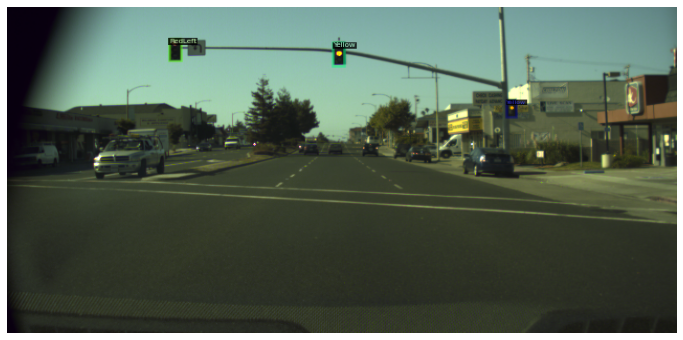

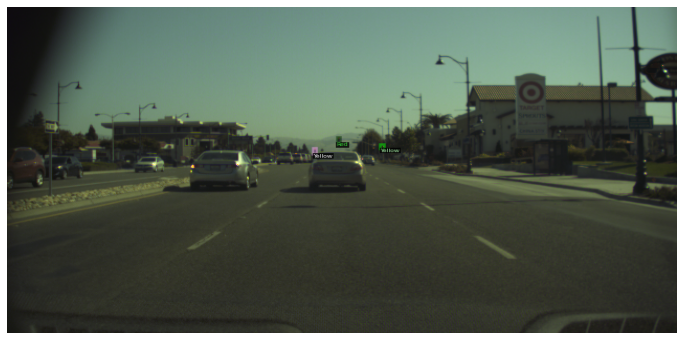

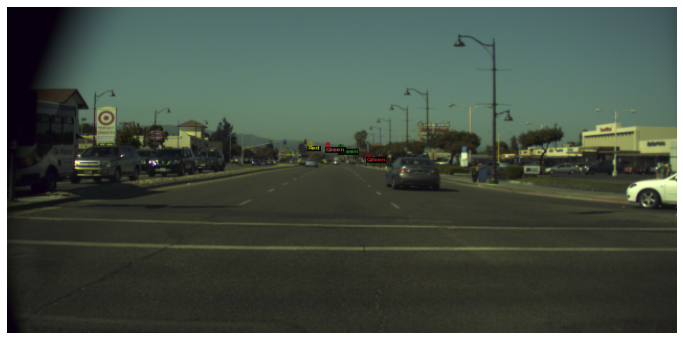

In [48]:
del d
for d in random.sample(dataset_dicts, 3):
    print('file_name=', d["file_name"])
    #img_path = os.path.join(dataset_path, d["file_name"])
    img_path = d["file_name"]
    img = cv2.imread(img_path)
    visualizer = Visualizer(img[:, :, ::-1], metadata=tl_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv_imshow(vis.get_image()[:, :, ::-1])


In [10]:
# Train
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = (dataset_path+'rgb/train',)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
# initialize from model zoo
cfg.MODEL.WEIGHTS = "https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl"
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.01
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 8  # totally 8 classes

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
print('outdir=',cfg.OUTPUT_DIR)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
print("start training...")
trainer.train()
print("training finished")


outdir= ./output
[12/20 20:51:00 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
 

***path train***
***??yaml????***


/tmp/ipykernel_22065/3179215624.py:43: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(file_data)


image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/207374.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/207384.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/207386.png
width*height= 1280 720
x_min= 610.625
x_min= 633.875
x_min= 649.5
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/207390.png
width*height= 1280 720
x_min= 612.0
x_min= 632.25
x_min= 649.25
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/207458.png
width*height= 1280 720
x_min= 608.875
x_min= 633.125
x_min= 652.875
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/207464.png
width*height= 1280 720
x_min= 

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/209804.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/209828.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/209838.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/209874.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/209900.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/210020.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/210

width*height= 1280 720
x_min= 635.75
x_min= 669.75
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/213360.png
width*height= 1280 720
x_min= 633.5
x_min= 669.125
x_min= 664.875
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/213434.png
width*height= 1280 720
x_min= 585.625
x_min= 635.875
x_min= 674.0
x_min= 678.0
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/213446.png
width*height= 1280 720
x_min= 587.5
x_min= 637.25
x_min= 677.0
x_min= 682.75
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/213454.png
width*height= 1280 720
x_min= 590.125
x_min= 641.375
x_min= 681.5
x_min= 687.125
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/213584.png
width*height= 1280 720
x_min= 665.625
x_m

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/216360.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/216384.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/216386.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/216448.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/216466.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/216514.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/216

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/218536.png
width*height= 1280 720
x_min= 1046.875
x_min= 1106.75
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/218584.png
width*height= 1280 720
x_min= 925.5
x_min= 1153.875
x_min= 1052.125
x_min= 1203.375
x_min= 1017.25
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/218648.png
width*height= 1280 720
x_min= 503.5
x_min= 672.125
x_min= 777.5
x_min= 896.75
x_min= 905.375
x_min= 625.25
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/218660.png
width*height= 1280 720
x_min= 486.875
x_min= 662.875
x_min= 771.625
x_min= 896.125
x_min= 912.5
x_min= 614.125
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/218702.png
w

width*height= 1280 720
x_min= 427.875
x_min= 573.875
x_min= 691.125
x_min= 961.375
x_min= 1125.25
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/224118.png
width*height= 1280 720
x_min= 399.375
x_min= 560.25
x_min= 688.5
x_min= 984.75
x_min= 1168.625
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/224124.png
width*height= 1280 720
x_min= 394.25
x_min= 557.0
x_min= 687.625
x_min= 990.375
x_min= 1177.125
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/224168.png
width*height= 1280 720
x_min= 340.0
x_min= 541.5
x_min= 704.625
x_min= 1074.875
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/224254.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/224450.png
wid

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/226122.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/226202.png
width*height= 1280 720
x_min= 562.0
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/226236.png
width*height= 1280 720
x_min= 554.375
x_min= 618.75
x_min= 584.875
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/226240.png
width*height= 1280 720
x_min= 621.625
x_min= 557.75
x_min= 588.5
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/226280.png
width*height= 1280 720
x_min= 579.375
x_min= 613.875
x_min= 651.375
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/226

width*height= 1280 720
x_min= 436.375
x_min= 573.125
x_min= 631.0
x_min= 713.0
x_min= 862.625
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/230070.png
width*height= 1280 720
x_min= 564.125
x_min= 629.875
x_min= 722.0
x_min= 892.625
x_min= 385.875
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/230086.png
width*height= 1280 720
x_min= 558.125
x_min= 630.375
x_min= 731.375
x_min= 917.125
x_min= 336.5
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/230180.png
width*height= 1280 720
x_min= 527.625
x_min= 639.125
x_min= 801.5
x_min= 1097.125
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/230182.png
width*height= 1280 720
x_min= 525.75
x_min= 638.5
x_min= 802.75
x_min= 1100.5
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los

x_min= 539.0
x_min= 503.75
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/233566.png
width*height= 1280 720
x_min= 31.5
x_min= 459.75
x_min= 578.875
x_min= 718.75
x_min= 1041.0
x_min= 502.625
x_min= 539.625
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/233688.png
width*height= 1280 720
x_min= 615.5
x_min= 456.875
x_min= 668.0
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/233898.png
width*height= 1280 720
x_min= 142.5
x_min= 651.625
x_min= 820.125
x_min= 676.0
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/233914.png
width*height= 1280 720
x_min= 34.0
x_min= 641.375
x_min= 844.5
x_min= 667.0
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/233926.png
width*height= 1280 720
x_mi

width*height= 1280 720
x_min= 649.375
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/237186.png
width*height= 1280 720
x_min= 641.0
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/237208.png
width*height= 1280 720
x_min= 633.5
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/237226.png
width*height= 1280 720
x_min= 625.625
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/237256.png
width*height= 1280 720
x_min= 606.5
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/237258.png
width*height= 1280 720
x_min= 605.375
image_path= /home/jianhaoli/datasets/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/237304.png
width*height= 1280 720
x_min= 585.625
image_path= /h

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/9074.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/9142.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/9212.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/9282.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/9350.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/9420.png
width*height= 1280 720
x_min= 828.2785276781
x_min= 1263.2003717514
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/9490.png
width*height= 128

width*height= 1280 720
x_min= 608.3104092529
x_min= 646.9736685413
x_min= 713.6613036897
x_min= 453.862395514
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/14956.png
width*height= 1280 720
x_min= 745.480057451
x_min= 603.589406881
x_min= 653.6179780703
x_min= 406.1482130706
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/15026.png
width*height= 1280 720
x_min= 576.2949026095
x_min= 649.7291467613
x_min= 773.1381842394
x_min= 798.9589020486
x_min= 300.0450571305
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/15096.png
width*height= 1280 720
x_min= 60.5562652412
x_min= 533.672637582
x_min= 667.3968258747
x_min= 892.0398082084
x_min= 1059.6595246124
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/15164.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/trai

width*height= 1280 720
x_min= 660.4849768654
x_min= 581.8283890163
x_min= 861.1963083012
x_min= 801.1382257611
x_min= 695.971680042
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/21868.png
width*height= 1280 720
x_min= 937.0642841251
x_min= 843.8698035211
x_min= 672.1765150926
x_min= 576.9098021713
x_min= 489.921361013
x_min= 379.2720103637
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/21938.png
width*height= 1280 720
x_min= 687.8078226104
x_min= 891.419972575
x_min= 575.0854286527
x_min= 1032.613401717
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/22008.png
width*height= 1280 720
x_min= 1118.3501520064
x_min= 559.1092876759
x_min= 686.9573014928
x_min= 918.8584745256
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/22078.png
width*height= 1280 720
x_min= 552.7638977939

width*height= 1280 720
x_min= 879.1373316359
x_min= 775.6278194017
x_min= 727.0002593127
x_min= 660.873877679
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/25070.png
width*height= 1280 720
x_min= 774.0657898342
x_min= 719.0020256076
x_min= 644.3276930508
x_min= 907.3120662847
x_min= 870.3307429562
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/25138.png
width*height= 1280 720
x_min= 929.0347136677
x_min= 874.7510661907
x_min= 770.6243064228
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/25208.png
width*height= 1280 720
x_min= 948.0672214105
x_min= 883.1087287777
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/27068.png
width*height= 1280 720
x_min= 957.8368685527
x_min= 883.9101081417
x_min= 771.7658171419
x_min= 707.1707649977
x_min= 619.7027326544
image_path= /home/ji

width*height= 1280 720
x_min= 648.9419631
x_min= 262.472006209
x_min= 981.9073426099
x_min= 1153.0628039464
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/33062.png
width*height= 1280 720
x_min= 913.6226074514
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/33132.png
width*height= 1280 720
x_min= 614.9509647028
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/33202.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/33272.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/33340.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/33410.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/r

width*height= 1280 720
x_min= 746.3920351054
x_min= 788.9857980248
x_min= 684.8207690016
x_min= 690.5273624133
x_min= 712.1720253675
x_min= 803.8202998757
x_min= 797.7460102965
x_min= 804.2848540038
x_min= 741.1337195867
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/37318.png
width*height= 1280 720
x_min= 777.9420810374
x_min= 713.600550145
x_min= 715.8065668429
x_min= 643.0854078409
x_min= 648.2359968673
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/37386.png
width*height= 1280 720
x_min= 619.4114055446
x_min= 702.9667823156
x_min= 793.3407474883
x_min= 785.3896004655
x_min= 798.1043635872
x_min= 704.99724236
x_min= 650.8353756548
x_min= 611.9256953195
x_min= 786.4625648451
image_path= /home/jianhaoli/datasets/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/37456.png
width*height= 1280 720
x_min= 1029.1188264997
x_min= 963.5554412912
x_min= 1012.9438090211
x

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/23856.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/23924.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/23994.png
width*height= 1280 720
x_min= 1247.3526054383
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/24064.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/24134.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/24202.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/24456.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/24526.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/24804.png
width*height= 1280 720
image_path= /home/

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/28416.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/28486.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/28554.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/28624.png
width*height= 1280 720
x_min= 522.4693009192
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-52-01_bag/28694.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/29906.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/29974.png
width*height= 1280 720
x_min= 578.59416102
x_min= 611.3159132542
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/30044.png
width*height= 1280 720
x_min= 563.7439475902
x_min= 603.1203529267
image_path= /home/jianhaoli/datasets/

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/35748.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/35818.png
width*height= 1280 720
x_min= 614.8423408204
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/35888.png
width*height= 1280 720
x_min= 510.3101239386
x_min= 611.9156148369
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/35956.png
width*height= 1280 720
x_min= 486.7159854051
x_min= 611.6669964766
x_min= 639.6019890053
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/36026.png
width*height= 1280 720
x_min= 498.2990274366
x_min= 602.1257612864
x_min= 637.7873777189
x_min= 720.0279189114
x_min= 749.5015589341
x_min= 555.7632874297
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/36096.png
width*height= 1280 720
x_min= 443.1865257133
x_min= 593.4176296347
x_min= 641.5064202438
x_min= 748.086406313
x_

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/41620.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/41690.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/41760.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/41828.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/41898.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/41968.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/42038.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/42106.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/42176.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/

width*height= 1280 720
x_min= 742.2962925345
x_min= 635.935221068
x_min= 566.9730713728
x_min= 429.2161436396
x_min= 1098.517276074
x_min= 484.3820018762
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/50040.png
width*height= 1280 720
x_min= 605.0364245723
x_min= 680.7421186034
x_min= 803.4074422198
x_min= 447.162963197
x_min= 509.5583905807
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/50110.png
width*height= 1280 720
x_min= 908.1385208029
x_min= 751.8376579419
x_min= 649.3477791338
x_min= 442.4532133731
x_min= 525.3431818781
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/50180.png
width*height= 1280 720
x_min= 1154.8308910671
x_min= 897.6408812396
x_min= 723.1072661783
x_min= 506.1630703562
x_min= 361.3279062552
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/50250.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/50318.png
width*height= 1280 

width*height= 1280 720
x_min= 548.9612963115
x_min= 637.4054017483
x_min= 599.4980040468
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/55252.png
width*height= 1280 720
x_min= 543.7475566714
x_min= 645.0311192123
x_min= 747.1606670228
x_min= 602.5376352114
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/55320.png
width*height= 1280 720
x_min= 531.0715583215
x_min= 597.3293115951
x_min= 641.3265548756
x_min= 755.4473994872
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/55390.png
width*height= 1280 720
x_min= 633.8504741732
x_min= 586.4256379789
x_min= 512.262701542
x_min= 760.2465244615
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/55460.png
width*height= 1280 720
x_min= 765.1179570033
x_min= 565.9701097921
x_min= 619.4067311494
x_min= 719.6080060651
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/55530.png
width*height= 1280 720
x_min= 629.9746159007
x_min= 568.1968627

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/66954.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/67024.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/67092.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/67162.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/67232.png
width*height= 1280 720
x_min= 389.6849708425
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/67302.png
width*height= 1280 720
x_min= 458.7098174386
x_min= 427.458989081
x_min= 532.1058886354
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/67370.png
width*height= 1280 720
x_min= 482.1725487753
x_min= 521.283156439
x_min= 400.6942326672
x_min= 611.2276831259
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/6744

width*height= 1280 720
x_min= 640.7695961873
x_min= 667.1519750419
x_min= 610.1017547776
x_min= 718.8398461854
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/71826.png
width*height= 1280 720
x_min= 688.1205115621
x_min= 658.425885612
x_min= 622.0423678096
x_min= 746.5866233058
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/71896.png
width*height= 1280 720
x_min= 654.0618518642
x_min= 688.6870880598
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/71966.png
width*height= 1280 720
x_min= 654.0733209968
x_min= 614.3562315322
x_min= 563.3679859998
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/72034.png
width*height= 1280 720
x_min= 540.7732600441
x_min= 600.095793181
x_min= 647.7776783062
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/72104.png
width*height= 1280 720
x_min= 651.1798432997
x_min= 596.7318377
x_min= 530.3442186675
image_path= /home/jianhaoli/datasets/rgb/tra

width*height= 1280 720
x_min= 568.7435756414
x_min= 609.6345677662
x_min= 642.4402986899
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/75384.png
width*height= 1280 720
x_min= 560.2148501401
x_min= 611.2819692727
x_min= 651.4287692109
x_min= 733.0442015055
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/75454.png
width*height= 1280 720
x_min= 597.5977717587
x_min= 651.9172553514
x_min= 528.5903849847
x_min= 763.1814632954
x_min= 917.7689781789
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/75524.png
width*height= 1280 720
x_min= 453.7886505798
x_min= 560.477472537
x_min= 646.6457989302
x_min= 820.664911889
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/75592.png
width*height= 1280 720
x_min= 266.3054289265
x_min= 497.5532830799
x_min= 683.0715732911
x_min= 1056.906307421
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/75662.png
width*height= 1280 720
image_path= /home/j

width*height= 1280 720
x_min= 433.8133058317
x_min= 747.243991565
x_min= 874.7705072181
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/80112.png
width*height= 1280 720
x_min= 274.2687590347
x_min= 859.9466577077
x_min= 1101.6372922589
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/80182.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/80252.png
width*height= 1280 720
x_min= 591.7092164186
x_min= 615.204672688
x_min= 633.5473192223
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/80322.png
width*height= 1280 720
x_min= 580.5075549159
x_min= 585.9060295484
x_min= 612.3147838316
x_min= 633.2521111224
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/80390.png
width*height= 1280 720
x_min= 567.9548040848
x_min= 604.5421836798
x_min= 575.2203830115
x_min= 628.4148001532
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-10-55-33_bag/80460.png
wid

width*height= 1280 720
x_min= 644.895841679
x_min= 698.018927494
x_min= 641.504096506
x_min= 652.3094468006
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/85944.png
width*height= 1280 720
x_min= 619.5890823183
x_min= 680.2105617169
x_min= 688.1581053854
x_min= 544.8871396685
x_min= 579.3332219754
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/86014.png
width*height= 1280 720
x_min= 621.1559941249
x_min= 704.1733450251
x_min= 693.250842611
x_min= 527.9247314458
x_min= 571.7013736165
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/86084.png
width*height= 1280 720
x_min= 735.7816266445
x_min= 718.4481765876
x_min= 631.0914444469
x_min= 571.2950732642
x_min= 511.0321288295
x_min= 641.186674479
x_min= 626.7421613415
x_min= 609.3347755266
x_min= 601.5137977295
x_min= 437.2125909528
x_min= 722.5001910137
x_min= 511.1752850412
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/86152.png
width*height= 128

width*height= 1280 720
x_min= 755.3224258479
x_min= 688.1631284523
x_min= 643.667306304
x_min= 592.5511331832
x_min= 778.6355939138
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/89470.png
width*height= 1280 720
x_min= 586.3331076713
x_min= 651.3953135769
x_min= 706.2367305786
x_min= 792.4856346543
x_min= 835.5822051217
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/89540.png
width*height= 1280 720
x_min= 554.5937697964
x_min= 645.1396580082
x_min= 721.5817305831
x_min= 841.5159044073
x_min= 940.6643025269
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/89610.png
width*height= 1280 720
x_min= 494.8770120615
x_min= 645.6929202206
x_min= 770.6457697491
x_min= 968.414735725
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/89678.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/89748.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/

width*height= 1280 720
x_min= 649.3317766073
x_min= 566.3831361239
x_min= 466.6852509276
x_min= 850.138017645
x_min= 993.9406510028
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/95550.png
width*height= 1280 720
x_min= 649.5202854155
x_min= 920.4515482929
x_min= 542.956265315
x_min= 406.3130492346
x_min= 1261.1215968654
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/95620.png
width*height= 1280 720
x_min= 1096.4843499713
x_min= 647.9445624903
x_min= 469.4022118666
x_min= 249.6911153465
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/95690.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/95760.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/95828.png
width*height= 1280 720
x_min= 637.7395407124
x_min= 767.3566750254
x_min= 818.2471685433
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/95898.png
wi

width*height= 1280 720
x_min= 1048.5238842332
x_min= 837.3937241991
x_min= 600.3833781171
x_min= 456.9866769412
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/101200.png
width*height= 1280 720
x_min= 595.9563978174
x_min= 847.4910158061
x_min= 1106.6981482045
x_min= 445.5394559029
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/101268.png
width*height= 1280 720
x_min= 591.980333218
x_min= 869.0695536627
x_min= 1221.5429746282
x_min= 424.5423947953
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/101338.png
width*height= 1280 720
x_min= 978.2080134771
x_min= 577.2742034273
x_min= 327.0808295666
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/101408.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/101478.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/101546.png
width*height= 1280 720
image_path= /ho

width*height= 1280 720
x_min= 526.1927587118
x_min= 770.937081263
x_min= 962.0302670697
x_min= 325.8560850386
x_min= 611.4378813636
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/105732.png
width*height= 1280 720
x_min= 794.1747944815
x_min= 498.5669172654
x_min= 168.9746273287
x_min= 599.480281437
x_min= 1080.2230548908
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/105802.png
width*height= 1280 720
x_min= 806.5496267921
x_min= 475.8588892307
x_min= 589.5349316193
x_min= 1182.7890036612
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/105870.png
width*height= 1280 720
x_min= 1267.8285210866
x_min= 815.9380071225
x_min= 461.4083252038
x_min= 583.3537423172
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/105940.png
width*height= 1280 720
x_min= 829.1618928348
x_min= 581.8953609771
x_min= 453.6113506059
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/106774.png
width*height

width*height= 1280 720
x_min= 589.5298304565
x_min= 844.1689792029
x_min= 214.9839574805
x_min= 482.4632781557
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/113340.png
width*height= 1280 720
x_min= 593.115554529
x_min= 909.5454356548
x_min= 472.5798747901
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/113410.png
width*height= 1280 720
x_min= 598.9732697982
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/113480.png
width*height= 1280 720
x_min= 601.9469943119
x_min= 461.9162173398
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/113690.png
width*height= 1280 720
x_min= 601.9989082122
x_min= 456.1622626879
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/113760.png
width*height= 1280 720
x_min= 587.5751838233
x_min= 1230.5913081869
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/113830.png
width*height= 1280 720
x_min= 561.4656398558
x_min= 344.902022

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/117650.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/117720.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/117790.png
width*height= 1280 720
x_min= 651.7639328474
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/117858.png
width*height= 1280 720
x_min= 585.3481634632
x_min= 498.5552443295
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/117928.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/117998.png
width*height= 1280 720
x_min= 602.3401799219
x_min= 676.3214544375
x_min= 533.7145392279
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/118068.png
width*height= 1280 720
x_min= 697.5959661219
x_min= 681.3619285087
x_min= 598.6614047428
x_min= 524.2836359148
image_path= /home/jian

width*height= 1280 720
x_min= 622.9196830045
x_min= 573.4947140116
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/123120.png
width*height= 1280 720
x_min= 624.4569516225
x_min= 561.4256599063
x_min= 751.3411989735
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/123188.png
width*height= 1280 720
x_min= 630.9551819663
x_min= 544.2542205123
x_min= 822.2003279629
x_min= 441.0795239688
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/123258.png
width*height= 1280 720
x_min= 818.5713073571
x_min= 631.3901412227
x_min= 495.970682013
x_min= 1064.1488698026
x_min= 222.8890897316
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/123328.png
width*height= 1280 720
x_min= 285.509609714
x_min= 613.1629318953
x_min= 1019.5796673101
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/123398.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/123466.

width*height= 1280 720
x_min= 618.5658627708
x_min= 768.4896873046
x_min= 939.8658079223
x_min= 261.6904068539
x_min= 525.2005553556
x_min= 602.5149322807
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/128768.png
width*height= 1280 720
x_min= 547.7974925737
x_min= 851.1552053196
x_min= 379.8353715131
x_min= 593.0692422688
x_min= 688.4199423605
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/128838.png
width*height= 1280 720
x_min= 712.6099882655
x_min= 585.3193478714
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/128906.png
width*height= 1280 720
x_min= 605.0799180043
x_min= 797.4308120728
x_min= 485.8201533408
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/128976.png
width*height= 1280 720
x_min= 600.4101557864
x_min= 1011.0497658352
x_min= 856.2039591775
x_min= 402.9245917383
x_min= 44.9603487825
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/129046.png
width*height=

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/135860.png
width*height= 1280 720
x_min= 824.0186938911
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/135930.png
width*height= 1280 720
x_min= 753.4822830161
x_min= 720.2060154965
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/136000.png
width*height= 1280 720
x_min= 624.7492080583
x_min= 665.0150322222
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/136068.png
width*height= 1280 720
x_min= 575.9035875875
x_min= 623.0456165731
x_min= 750.8418775713
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/136138.png
width*height= 1280 720
x_min= 611.5814253218
x_min= 559.6021507104
x_min= 760.1686446655
x_min= 729.7161403478
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/136208.png
width*height= 1280 720
x_min= 776.0400703554
x_min= 738.097559009
x_min= 609.6345781613
x_min= 552.2175791

width*height= 1280 720
x_min= 710.0804654905
x_min= 1187.9586488416
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/140098.png
width*height= 1280 720
x_min= 626.7958731639
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/140168.png
width*height= 1280 720
x_min= 623.9195061994
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/140238.png
width*height= 1280 720
x_min= 595.4822166501
x_min= 624.7622166501
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/140306.png
width*height= 1280 720
x_min= 678.2095213047
x_min= 625.8739089942
x_min= 506.4766908757
x_min= 593.640799812
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/140376.png
width*height= 1280 720
x_min= 565.8967741502
x_min= 604.2562464283
x_min= 663.6559760605
x_min= 463.192883872
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-11-26-32_bag/140446.png
width*height= 1280 720
x_min= 409.0642158531
x_min= 532.8565038

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/433864.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/433934.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/434004.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/434074.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/434142.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/434212.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/434282.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/434350.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/434420.png
width*height= 1280 720
image_path= /home/jianhaoli/data

width*height= 1280 720
x_min= 651.2338516004
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/442922.png
width*height= 1280 720
x_min= 656.1826814328
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/442992.png
width*height= 1280 720
x_min= 653.1180152756
x_min= 607.7778407369
x_min= 684.025170828
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/443062.png
width*height= 1280 720
x_min= 595.6877858305
x_min= 649.1416879339
x_min= 748.5244282523
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/443132.png
width*height= 1280 720
x_min= 769.2792934898
x_min= 694.5114758338
x_min= 648.7077677201
x_min= 585.3908770925
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/443200.png
width*height= 1280 720
x_min= 801.9224471975
x_min= 712.9754991646
x_min= 660.6308872826
x_min= 585.687879994
x_min= 866.6434876555
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/443270.pn

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/448148.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/448216.png
width*height= 1280 720
x_min= 660.3744189028
x_min= 730.5503283883
x_min= 605.2685001403
x_min= 637.1362888237
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/448286.png
width*height= 1280 720
x_min= 670.2979502824
x_min= 602.9687577358
x_min= 640.2358384812
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/448356.png
width*height= 1280 720
x_min= 599.5714876129
x_min= 646.7727652712
x_min= 685.0805589781
x_min= 808.8307054682
x_min= 764.6797620719
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/448426.png
width*height= 1280 720
x_min= 793.9334999655
x_min= 694.0119674711
x_min= 646.7544526141
x_min= 586.9107840367
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/448494.png
width*height= 1280

width*height= 1280 720
x_min= 560.9401424856
x_min= 637.5964464579
x_min= 685.6378972351
x_min= 773.3201079432
x_min= 808.2354792731
x_min= 345.7749967971
x_min= 928.589434883
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/455376.png
width*height= 1280 720
x_min= 572.7266967625
x_min= 670.8164200653
x_min= 729.3428564935
x_min= 838.9487426015
x_min= 899.8540588827
x_min= 1069.6248503944
x_min= 1089.9127339077
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/455444.png
width*height= 1280 720
x_min= 572.3915397127
x_min= 688.2868790423
x_min= 759.129070375
x_min= 892.7349575378
x_min= 994.026862689
x_min= 1224.2818383155
x_min= 1213.7506604864
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/455514.png
width*height= 1280 720
x_min= 525.7396895878
x_min= 658.5571396007
x_min= 742.3244657563
x_min= 1060.9169033904
x_min= 898.1951895908
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/455584.png
width*

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/462698.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/462766.png
width*height= 1280 720
x_min= 607.0319723257
x_min= 707.074125995
x_min= 408.5674298779
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/462836.png
width*height= 1280 720
x_min= 743.8777940226
x_min= 735.4078613548
x_min= 601.3005941155
x_min= 535.835072871
x_min= 645.3943675312
x_min= 617.5949207344
x_min= 343.5488839588
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/462906.png
width*height= 1280 720
x_min= 490.5638473937
x_min= 585.2181134673
x_min= 786.3463114341
x_min= 835.383267162
x_min= 218.28635766
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/462976.png
width*height= 1280 720
x_min= 351.5727836854
x_min= 542.5705331228
x_min= 941.2860191551
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/468834.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/468904.png
width*height= 1280 720
x_min= 718.5608655327
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/468974.png
width*height= 1280 720
x_min= 705.9166004136
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/469042.png
width*height= 1280 720
x_min= 713.1353558035
x_min= 702.5523606535
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/469112.png
width*height= 1280 720
x_min= 715.4246517901
x_min= 701.5753001124
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/469182.png
width*height= 1280 720
x_min= 719.5087061352
x_min= 701.2564250704
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/469252.png
width*height= 1280 720
x_min= 726.3944735988
x_min= 700.1825556068
image_path= /home/jian

width*height= 1280 720
x_min= 419.7148556523
x_min= 589.0337608083
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/474422.png
width*height= 1280 720
x_min= 268.2947168796
x_min= 612.3719834556
x_min= 679.3865304324
x_min= 553.3799354913
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/474492.png
width*height= 1280 720
x_min= 715.0508154111
x_min= 697.5962699565
x_min= 616.9400570174
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/474562.png
width*height= 1280 720
x_min= 628.1027921046
x_min= 762.0544702959
x_min= 732.1810525744
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/474632.png
width*height= 1280 720
x_min= 626.9369004086
x_min= 843.2154838443
x_min= 776.0154838443
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/474700.png
width*height= 1280 720
x_min= 900.6069013805
x_min= 623.8991439482
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/474770.

width*height= 1280 720
x_min= 617.3175591527
x_min= 673.134723776
x_min= 579.5030132653
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/478660.png
width*height= 1280 720
x_min= 573.3207153306
x_min= 618.617963316
x_min= 681.9416671323
x_min= 685.8432681355
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/478730.png
width*height= 1280 720
x_min= 588.2950172923
x_min= 644.8926435432
x_min= 720.4151010717
x_min= 730.2504742561
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/478800.png
width*height= 1280 720
x_min= 571.502787614
x_min= 640.6721513143
x_min= 733.8840130249
x_min= 755.3746962547
x_min= 353.6453684564
x_min= 735.5599673938
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/478868.png
width*height= 1280 720
x_min= 620.1558363011
x_min= 773.900701166
x_min= 735.71022534
x_min= 537.49471364
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/478938.png
width*height= 1280 72

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/484056.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/484126.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/484196.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/484266.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/484334.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/484404.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/484474.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/484544.png
width*height= 1280 720
x_min= 387.3205127489
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/484612.png
width*height= 1280 720
x_min= 596

width*height= 1280 720
x_min= 177.9132198932
x_min= 452.9517743277
x_min= 550.1243177123
x_min= 721.7082681931
x_min= 744.6153092012
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/490326.png
width*height= 1280 720
x_min= 338.7587303567
x_min= 513.1501662422
x_min= 912.5309083284
x_min= 871.2714149159
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/490396.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/490466.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/490534.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/490604.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/490674.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/490744.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/tra

width*height= 1280 720
x_min= 599.0101643363
x_min= 524.0111187169
x_min= 726.5230484745
x_min= 875.3450797363
x_min= 90.5528725708
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/495606.png
width*height= 1280 720
x_min= 779.338669669
x_min= 587.5492986305
x_min= 474.9213122824
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/495676.png
width*height= 1280 720
x_min= 908.3836538755
x_min= 528.4588359522
x_min= 307.0388305589
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/495746.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/495814.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/495884.png
width*height= 1280 720
x_min= 623.4441292849
x_min= 586.5210523618
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/495954.png
width*height= 1280 720
x_min= 569.4166231055
x_min= 610.2423326996
image_path= /home/j

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/499774.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/499844.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/499914.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/499984.png
width*height= 1280 720
x_min= 633.5477789419
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/500052.png
width*height= 1280 720
x_min= 628.6448726857
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/500122.png
width*height= 1280 720
x_min= 719.2101282768
x_min= 703.9838761179
x_min= 616.7705675643
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/500192.png
width*height= 1280 720
x_min= 735.2766563211
x_min= 709.7885781082
x_min= 607.7764951032
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46

width*height= 1280 720
x_min= 280.4925987332
x_min= 546.0270016561
x_min= 610.4930210736
x_min= 690.2988463163
x_min= 788.8852042275
x_min= 862.2710309992
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/505998.png
width*height= 1280 720
x_min= 265.0428900621
x_min= 539.8371941678
x_min= 605.6779021325
x_min= 687.6248047873
x_min= 787.7998108136
x_min= 868.0917816165
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/506066.png
width*height= 1280 720
x_min= 247.5881564457
x_min= 531.3134171592
x_min= 599.7501939317
x_min= 685.7758619309
x_min= 789.810625251
x_min= 787.7886865958
x_min= 875.1815261491
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/506136.png
width*height= 1280 720
x_min= 250.8564141148
x_min= 953.0411075104
x_min= 560.4833484742
x_min= 635.3307280096
x_min= 730.1665890194
x_min= 844.3711951611
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/506206.png
width*height= 1280 720
x_min= 8

width*height= 1280 720
x_min= 1077.8266620732
x_min= 474.6813007514
x_min= 677.3828858651
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/512920.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/512988.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/513058.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/513128.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/513198.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/513266.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/513336.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/513406.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag

width*height= 1280 720
x_min= 489.3471724357
x_min= 1061.3973123483
x_min= 727.7847643908
x_min= 707.5600452896
x_min= 626.2129749977
x_min= 610.1164156204
x_min= 552.1943122596
x_min= 395.5426416606
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/518406.png
width*height= 1280 720
x_min= 748.0970450111
x_min= 708.6002947915
x_min= 584.0259016774
x_min= 509.3990360058
x_min= 607.0564319848
x_min= 311.8019775222
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/518476.png
width*height= 1280 720
x_min= 847.1327616193
x_min= 472.1641213941
x_min= 575.1017501662
x_min= 749.2061415161
x_min= 199.2628633524
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/518546.png
width*height= 1280 720
x_min= 838.0415079484
x_min= 554.8140747663
x_min= 390.7797832888
x_min= 621.2243696699
x_min= 698.291403285
x_min= 710.9017823522
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/518616.png
width*height= 1280 720
x_min= 

width*height= 1280 720
x_min= 829.5083881326
x_min= 783.5343621586
x_min= 666.9407078394
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/523258.png
width*height= 1280 720
x_min= 888.7418736487
x_min= 795.1186852429
x_min= 643.5244823444
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/523326.png
width*height= 1280 720
x_min= 668.8963125583
x_min= 904.6503973347
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/523396.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/523466.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/523534.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/523604.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/523674.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/527856.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/527924.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/527994.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/528064.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/528134.png
width*height= 1280 720
x_min= 944.7897902882
x_min= 844.2506757404
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/528202.png
width*height= 1280 720
x_min= 790.5055166845
x_min= 787.7244129533
x_min= 839.8609008858
x_min= 668.5748025276
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/528272.png
width*height= 1280 720
x_min= 713.5902288053
x_min= 650.2259633758
x_min= 639.8583524295
x_min= 488.8580040645
image_path= /home/jian

width*height= 1280 720
x_min= 649.0917260188
x_min= 772.1793977436
x_min= 834.92556211
x_min= 375.0156061642
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/531954.png
width*height= 1280 720
x_min= 660.7462880919
x_min= 864.1264695786
x_min= 1093.5736161846
x_min= 186.625539646
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/532024.png
width*height= 1280 720
x_min= 1233.8759850007
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/532094.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/532162.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/532232.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/532302.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/532372.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/trai

width*height= 1280 720
x_min= 651.5227528644
x_min= 1005.0818982526
x_min= 237.2840347021
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/537108.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/537178.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/537246.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/537316.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/537386.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/537456.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/537524.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/537594.png
width*height= 1280 720
x_min= 900.2238821392
image_path= /home/jianhaoli/datasets/rgb/train/2

width*height= 1280 720
x_min= 302.8740658069
x_min= 523.1885784216
x_min= 608.9428509181
x_min= 749.0948898347
x_min= 791.1459911563
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/544428.png
width*height= 1280 720
x_min= 182.2483144506
x_min= 474.421659797
x_min= 585.6380029553
x_min= 767.7639558371
x_min= 850.7485631856
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/544498.png
width*height= 1280 720
x_min= 399.5438949698
x_min= 561.8921929471
x_min= 828.6649265618
x_min= 1070.0239769496
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/544568.png
width*height= 1280 720
x_min= 205.9943461406
x_min= 508.8333022195
x_min= 1010.3100102801
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/544636.png
width*height= 1280 720
x_min= 572.714572676
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/544706.png
width*height= 1280 720
x_min= 595.1264941916
x_min= 566.2059109738
image_path= 

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/549240.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/549308.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/549378.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/549448.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/549518.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/549586.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/549656.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/549726.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/549794.png
width*height= 1280 720
image_path= /home/jianhaoli/data

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/553408.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/553476.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/553546.png
width*height= 1280 720
x_min= 632.3898190655
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/553616.png
width*height= 1280 720
x_min= 620.1014171012
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/553686.png
width*height= 1280 720
x_min= 610.399446368
x_min= 741.3733702552
x_min= 724.4164761644
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/553754.png
width*height= 1280 720
x_min= 602.4726429975
x_min= 751.6782714637
x_min= 784.1291783742
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/553824.png
width*height= 1280 720
x_min= 879.9599782905
x_min= 802.3350853416
x_min= 594.7073376967
i

width*height= 1280 720
x_min= 702.539903232
x_min= 609.0304002338
x_min= 533.7666539181
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/559430.png
width*height= 1280 720
x_min= 227.8757253388
x_min= 603.7466516101
x_min= 511.0953334945
x_min= 719.2487587023
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/559498.png
width*height= 1280 720
x_min= 613.3785296458
x_min= 490.8446105809
x_min= 765.2365379367
x_min= 1066.410668998
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/559568.png
width*height= 1280 720
x_min= 623.5002689437
x_min= 441.6222967345
x_min= 850.8583314318
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/559638.png
width*height= 1280 720
x_min= 634.7873510902
x_min= 288.2193339343
x_min= 1070.0035735333
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/559708.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/559776.

width*height= 1280 720
x_min= 334.975233084
x_min= 544.48037574
x_min= 1117.0288601561
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/563528.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/563598.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/563668.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/563736.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/563806.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/563876.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/563944.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/564014.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/56

x_min= 421.3999838289
x_min= 478.0449554854
x_min= 587.7610352754
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/573092.png
width*height= 1280 720
x_min= 328.854681327
x_min= 443.4106527459
x_min= 512.9717279415
x_min= 639.2427450414
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/573160.png
width*height= 1280 720
x_min= 720.160336693
x_min= 553.2001169757
x_min= 463.9785703026
x_min= 314.1486311886
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/573230.png
width*height= 1280 720
x_min= 464.309752114
x_min= 221.7145271457
x_min= 610.5053695867
x_min= 886.2525144198
x_min= 466.4245849169
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/573300.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/573368.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-14-40-46_bag/573438.png
width*height= 1280 720
x_min= 543.6688206546

width*height= 1280 720
x_min= 207.4149230947
x_min= 821.2171208969
x_min= 624.1736352449
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/580592.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/580662.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/580732.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/580802.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/580870.png
width*height= 1280 720
x_min= 577.5364355638
x_min= 525.804020429
x_min= 614.7904353849
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/580940.png
width*height= 1280 720
x_min= 592.4202268407
x_min= 548.8240409772
x_min= 483.7173359673
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/581010.png
width*height= 1280 720
x_min= 481.1248619422
x_min= 523.6386776201
x

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/585790.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/585860.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/585928.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/585998.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/586068.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/586138.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/586206.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/586276.png
width*height= 1280 720
x_min= 572.585312275
x_min= 605.5616225486
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/586346.png
width*height

width*height= 1280 720
x_min= 695.5528402806
x_min= 661.9470517237
x_min= 627.4569003101
x_min= 590.1367877548
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/590028.png
width*height= 1280 720
x_min= 708.8484748982
x_min= 632.6754121506
x_min= 591.6701587075
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/590096.png
width*height= 1280 720
x_min= 723.2169734097
x_min= 678.0742257569
x_min= 635.5526699033
x_min= 590.5136222395
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/590166.png
width*height= 1280 720
x_min= 734.1077718969
x_min= 678.2628379762
x_min= 629.783542822
x_min= 577.4205472273
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/590236.png
width*height= 1280 720
x_min= 736.756075001
x_min= 667.6831069408
x_min= 609.6335839344
x_min= 548.7691246293
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/590306.png
width*height= 1280 720
x_min= 514.5586038441
x_min= 660.228

width*height= 1280 720
x_min= 603.4541483147
x_min= 571.1387768842
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/594538.png
width*height= 1280 720
x_min= 568.8600815152
x_min= 607.4101129815
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/594608.png
width*height= 1280 720
x_min= 559.1242209955
x_min= 604.6744602299
x_min= 742.0439942792
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/594678.png
width*height= 1280 720
x_min= 546.6561271017
x_min= 599.1920122691
x_min= 765.2281436196
x_min= 725.0225956682
x_min= 329.3831685719
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/594748.png
width*height= 1280 720
x_min= 593.3842711501
x_min= 739.9569854397
x_min= 796.3585343476
x_min= 531.581639724
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/594816.png
width*height= 1280 720
x_min= 509.2017609031
x_min= 584.4945366821
x_min= 841.7604529094
x_min= 760.8336109412
image_path= /

width*height= 1280 720
x_min= 567.2097913544
x_min= 626.3788323464
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/599552.png
width*height= 1280 720
x_min= 561.0058115881
x_min= 629.9649370708
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/599620.png
width*height= 1280 720
x_min= 751.5608219019
x_min= 725.1098947298
x_min= 639.4975913295
x_min= 557.5602964014
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/599690.png
width*height= 1280 720
x_min= 538.4949192794
x_min= 639.505681383
x_min= 746.1414460109
x_min= 791.8652323867
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/599760.png
width*height= 1280 720
x_min= 878.0736120089
x_min= 777.2982686923
x_min= 636.8306015575
x_min= 502.7096166764
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/599828.png
width*height= 1280 720
x_min= 637.1164528495
x_min= 444.5761294516
x_min= 840.2145755172
x_min= 84.4627570251
x_min= 1167.82

width*height= 1280 720
x_min= 665.7815146144
x_min= 724.668080395
x_min= 733.6058296011
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/606104.png
width*height= 1280 720
x_min= 640.2418904958
x_min= 711.3744776478
x_min= 723.6951824936
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/606174.png
width*height= 1280 720
x_min= 617.6053859547
x_min= 706.6759076561
x_min= 725.9635573462
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/606244.png
width*height= 1280 720
x_min= 615.1421515097
x_min= 733.5793779785
x_min= 769.1283443134
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/606314.png
width*height= 1280 720
x_min= 632.4459382527
x_min= 908.2311208121
x_min= 813.5525493835
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/606382.png
width*height= 1280 720
x_min= 971.7262234169
x_min= 623.1539831572
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/606452.p

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/611510.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/611578.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/611648.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/611718.png
width*height= 1280 720
x_min= 578.5825529183
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/611788.png
width*height= 1280 720
x_min= 530.7173568481
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/611856.png
width*height= 1280 720
x_min= 548.322384366
x_min= 412.5554528584
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/611926.png
width*height= 1280 720
x_min= 603.8776102573
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/611996.png
width*height= 1280 720
x_min= 437.0105333365
x_min=

width*height= 1280 720
x_min= 1164.4974927714
x_min= 700.5435675344
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/619236.png
width*height= 1280 720
x_min= 668.0306778344
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/619306.png
width*height= 1280 720
x_min= 665.2046193919
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/619376.png
width*height= 1280 720
x_min= 675.9813569877
x_min= 619.9737064435
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/619446.png
width*height= 1280 720
x_min= 700.7764181509
x_min= 626.6246309757
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/619514.png
width*height= 1280 720
x_min= 724.811010601
x_min= 623.9066412167
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/619584.png
width*height= 1280 720
x_min= 614.4556461675
x_min= 777.3722891783
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/619654.png
w

width*height= 1280 720
x_min= 633.6125371939
x_min= 710.8773962274
x_min= 694.3760723086
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/628684.png
width*height= 1280 720
x_min= 632.9574666171
x_min= 734.8303761875
x_min= 708.5647975591
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/628752.png
width*height= 1280 720
x_min= 629.8471015738
x_min= 727.2857818536
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/628822.png
width*height= 1280 720
x_min= 638.9023323265
x_min= 850.8170758328
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/628892.png
width*height= 1280 720
x_min= 641.8786169026
x_min= 800.8367858055
x_min= 956.7957439744
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/628962.png
width*height= 1280 720
x_min= 643.1561728234
x_min= 1039.6302412571
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/629154.png
width*height= 1280 720
x_min= 643.07145

width*height= 1280 720
x_min= 573.2528276856
x_min= 695.8154197327
x_min= 896.5266242994
x_min= 1003.5834463478
x_min= 605.0969490761
x_min= 652.4191675178
x_min= 732.3558059722
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/632282.png
width*height= 1280 720
x_min= 534.9789459514
x_min= 733.8356999494
x_min= 1061.224861758
x_min= 599.8257181039
x_min= 657.6794625973
x_min= 752.5233907517
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/632350.png
width*height= 1280 720
x_min= 666.6921179641
x_min= 793.3798514238
x_min= 784.1473376422
x_min= 595.638796901
x_min= 361.4049086654
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/632420.png
width*height= 1280 720
x_min= 599.2604825057
x_min= 694.7578647046
x_min= 853.4348109026
x_min= 892.1623514033
x_min= 284.9385151713
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/632490.png
width*height= 1280 720
x_min= 563.824950821
x_min= 713.7877207391
x_min= 9

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/637536.png
width*height= 1280 720
x_min= 679.8074860657
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/637606.png
width*height= 1280 720
x_min= 612.6336425883
x_min= 649.4505025106
x_min= 709.2771223611
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/637676.png
width*height= 1280 720
x_min= 571.461740898
x_min= 616.5425997702
x_min= 689.5086956445
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/637746.png
width*height= 1280 720
x_min= 561.3241747153
x_min= 708.8470024031
x_min= 617.0612758995
x_min= 776.3650072966
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/637814.png
width*height= 1280 720
x_min= 584.2988899578
x_min= 653.9189194129
x_min= 876.141391508
x_min= 770.3575294551
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/637884.png
width*height= 1280 720
x_min= 591.05451942

width*height= 1280 720
x_min= 482.7580457447
x_min= 663.9759474322
x_min= 915.45063562
x_min= 1108.9355952678
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/642824.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/642894.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/642962.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/643032.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/643102.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/643172.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/643240.png
width*height= 1280 720
x_min= 857.9226708214
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/643380.png
width*height= 1280 720
image_path= /home/jianhaoli/

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/649362.png
width*height= 1280 720
x_min= 642.5398007693
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/649432.png
width*height= 1280 720
x_min= 623.486593675
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/649500.png
width*height= 1280 720
x_min= 649.6565084398
x_min= 756.684472925
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/649570.png
width*height= 1280 720
x_min= 654.797946271
x_min= 808.469522122
x_min= 854.93778505
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/649640.png
width*height= 1280 720
x_min= 694.8593715501
x_min= 985.2541643491
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/649708.png
width*height= 1280 720
x_min= 710.205934678
x_min= 1132.2611574167
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/651018.png
width*height= 1280 720
x_min=

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/656134.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/656204.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/656272.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/656342.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/656412.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/656482.png
width*height= 1280 720
x_min= 491.4899563952
x_min= 560.2145513879
x_min= 693.0094193765
x_min= 793.8600488423
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/656550.png
width*height= 1280 720
x_min= 861.8362088198
x_min= 639.6579909981
x_min= 528.9128112169
x_min= 1239.3364425369
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-3

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/661956.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/662026.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/662096.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/662166.png
width*height= 1280 720
x_min= 637.9908609425
x_min= 696.3965530354
x_min= 688.3544053388
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/662234.png
width*height= 1280 720
x_min= 626.5205716122
x_min= 696.3743363203
x_min= 686.0701340069
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/662304.png
width*height= 1280 720
x_min= 620.9509479426
x_min= 695.4157726466
x_min= 711.1587679175
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/662374.png
width*height= 1280 720
x_min= 626.6294747742
x_min= 723.8572435228


width*height= 1280 720
x_min= 552.508427295
x_min= 602.7524988606
x_min= 685.6719086278
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/667690.png
width*height= 1280 720
x_min= 539.352161982
x_min= 603.1597514593
x_min= 708.9132372654
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/667760.png
width*height= 1280 720
x_min= 508.3994416391
x_min= 595.8864170809
x_min= 744.2381975036
x_min= 852.5714433197
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/667828.png
width*height= 1280 720
x_min= 426.3665455045
x_min= 570.0935382586
x_min= 809.0196442084
x_min= 1215.1357662795
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/667898.png
width*height= 1280 720
x_min= 609.9232922368
x_min= 555.6191071398
x_min= 1117.8373931425
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/667968.png
width*height= 1280 720
x_min= 606.3030132303
x_min= 539.5864429684
image_path= /home/jianhaoli/datase

width*height= 1280 720
x_min= 597.1948002016
x_min= 560.0053439933
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/673974.png
width*height= 1280 720
x_min= 599.6782854865
x_min= 559.0148308099
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/674200.png
width*height= 1280 720
x_min= 558.5963897515
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/674270.png
width*height= 1280 720
x_min= 685.8651527821
x_min= 681.4565649704
x_min= 597.8682032419
x_min= 554.6881830945
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/674338.png
width*height= 1280 720
x_min= 549.1466140913
x_min= 595.9188810349
x_min= 687.2526759687
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/674408.png
width*height= 1280 720
x_min= 592.9647084907
x_min= 611.8955381516
x_min= 542.7251990062
x_min= 592.3822214243
x_min= 687.4436398426
x_min= 693.9857351606
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-0

width*height= 1280 720
x_min= 653.7370422636
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/679792.png
width*height= 1280 720
x_min= 648.4143500888
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/679862.png
width*height= 1280 720
x_min= 646.591467902
x_min= 707.6347897428
x_min= 720.6943010605
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/679932.png
width*height= 1280 720
x_min= 705.1693738167
x_min= 687.530610531
x_min= 610.9481568114
x_min= 560.5753311304
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/680002.png
width*height= 1280 720
x_min= 779.0078543282
x_min= 745.2909353025
x_min= 643.7925811221
x_min= 576.7063401742
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/680070.png
width*height= 1280 720
x_min= 549.769228876
x_min= 650.779283867
x_min= 798.964819269
x_min= 886.8011918663
x_min= 245.5024774487
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-

width*height= 1280 720
x_min= 922.2850170196
x_min= 538.1372420406
x_min= 255.8942746123
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/686780.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/686850.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/686920.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/687476.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/687684.png
width*height= 1280 720
x_min= 710.0585556416
x_min= 624.6968731827
x_min= 571.1262699934
x_min= 720.8355372542
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/687754.png
width*height= 1280 720
x_min= 561.2595676369
x_min= 621.9436443645
x_min= 718.722012749
x_min= 734.0028077571
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/689630.png
width*height= 1280 720
x

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/695086.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/695156.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/695224.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/695294.png
width*height= 1280 720
x_min= 772.6206794791
x_min= 725.1075351292
x_min= 623.6933484181
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/695364.png
width*height= 1280 720
x_min= 622.3866672465
x_min= 758.1471299889
x_min= 867.9113392186
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/695434.png
width*height= 1280 720
x_min= 615.543759301
x_min= 818.614098477
x_min= 1217.2396230934
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/695502.png
width*height= 1280 720
x_min= 608.5843926925
x_min= 882.8812771864
i

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/701742.png
width*height= 1280 720
x_min= 685.6317712358
x_min= 712.1756840159
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/701812.png
width*height= 1280 720
x_min= 607.1032902616
x_min= 702.0695300753
x_min= 742.3302984106
x_min= 472.9603850164
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/701882.png
width*height= 1280 720
x_min= 843.9818810016
x_min= 760.8259195738
x_min= 621.0084111396
x_min= 428.8411477328
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/701950.png
width*height= 1280 720
x_min= 649.9985677654
x_min= 892.356677871
x_min= 317.5534039358
x_min= 1245.9087640813
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/702020.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/702090.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rg

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/707972.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/708042.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/708112.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/708180.png
width*height= 1280 720
x_min= 516.762016483
x_min= 555.195730267
x_min= 579.3502517771
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/708250.png
width*height= 1280 720
x_min= 532.7476512017
x_min= 575.8410334423
x_min= 603.9504633674
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/708320.png
width*height= 1280 720
x_min= 559.9516971411
x_min= 610.3628235357
x_min= 643.0022855562
x_min= 720.5356351905
x_min= 732.861819571
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/708390.png
width*height= 1280 720
x_m

width*height= 1280 720
x_min= 525.2040568712
x_min= 676.076781927
x_min= 806.296450734
x_min= 963.523136807
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/712210.png
width*height= 1280 720
x_min= 665.4526491448
x_min= 957.3695974789
x_min= 329.4235236695
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/712280.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/712350.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/712418.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/712488.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/712558.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/712628.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/712696.png
width*hei

width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/719334.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/719404.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/719474.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/719544.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/719612.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/719682.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/719960.png
width*height= 1280 720
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/720098.png
width*height= 1280 720
x_min= 709.6290537711
x_min= 700.0380548354
x_min= 625.0586239064
image_path= /home/jianhaoli/datasets/rgb/train/2015-10-05-16-02-30_bag/

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (9, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (9,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (32, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (32,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, 

start training...
[12/20 20:52:14 d2.engine.train_loop]: Starting training from iteration 0


/home/jianhaoli/anaconda3/envs/rcnn/lib/python3.8/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:103: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  num_fg = fg_inds.nonzero().numel()


[12/20 20:52:20 d2.utils.events]:  eta: 0:01:19  iter: 19  total_loss: 2.242  loss_cls: 1.426  loss_box_reg: 0.4416  loss_rpn_cls: 0.05816  loss_rpn_loc: 0.1276  time: 0.2763  data_time: 0.0071  lr: 0.0006427  max_mem: 2645M
[12/20 20:52:25 d2.utils.events]:  eta: 0:01:14  iter: 39  total_loss: 1.154  loss_cls: 0.4779  loss_box_reg: 0.5154  loss_rpn_cls: 0.04071  loss_rpn_loc: 0.1221  time: 0.2785  data_time: 0.0020  lr: 0.0013087  max_mem: 2645M
[12/20 20:52:31 d2.utils.events]:  eta: 0:01:09  iter: 59  total_loss: 0.8486  loss_cls: 0.283  loss_box_reg: 0.3469  loss_rpn_cls: 0.03317  loss_rpn_loc: 0.1941  time: 0.2768  data_time: 0.0018  lr: 0.0019747  max_mem: 2645M
[12/20 20:52:36 d2.utils.events]:  eta: 0:01:03  iter: 79  total_loss: 1.06  loss_cls: 0.3048  loss_box_reg: 0.4357  loss_rpn_cls: 0.02704  loss_rpn_loc: 0.1607  time: 0.2754  data_time: 0.0019  lr: 0.0026407  max_mem: 2645M
[12/20 20:52:42 d2.utils.events]:  eta: 0:00:57  iter: 99  total_loss: 1.087  loss_cls: 0.3452  lo

In [37]:
%load_ext tensorboard
%tensorboard --logdir output

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 23000), started 6:45:17 ago. (Use '!kill 23000' to kill it.)

In [12]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
print('output=',cfg.OUTPUT_DIR)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
cfg.DATASETS.TEST = (dataset_path+'rgb/test', )
predictor = DefaultPredictor(cfg)

output= ./output


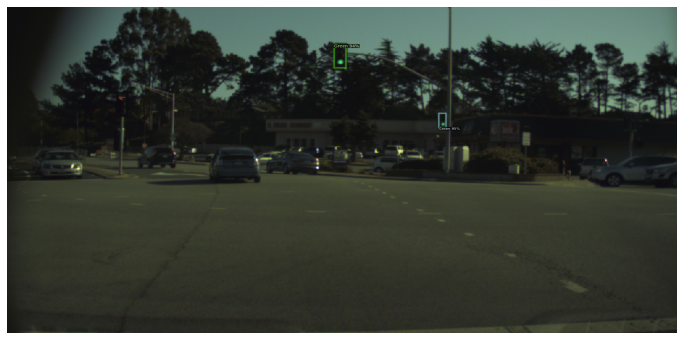

In [49]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread(dataset_path+'rgb/test/a.png')
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
               metadata=tl_metadata,
               scale=0.8,
               instance_mode=ColorMode.SEGMENTATION
)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv_imshow(v.get_image()[:, :, ::-1])